# 프로젝트 시작하기 앞서..

##빅데이터개론 프로젝트
학번: 20195234</br>
이름: 임지운</br>
소속: 정보과학대학 / 빅데이터 전공

**주제: 사고 후 부상 심각도 예측**

In [126]:
#자료 출처: data.gov.uk
#자료 이름: Road Traffic Accidents(도로교통사고)

#출처: https://www.data.gov.uk/dataset/6efe5505-941f-45bf-b576-4c1e09b579a1/road-traffic-accidents
#심부전 예측
#https://drive.google.com/file/d/1i1Q_MTnm7UdlLB_M0ja9iue3QU1KjEb2/view?usp=sharing
#https://drive.google.com/file/d/1gXVyoQBUIAZdqN1jtsuuE2mR5hoBS0YP/view?usp=drive_link 2019년도 교통 사고 -1

## 기본적인 패키지 설치

In [2]:
install.packages(c("tidyverse", "data.table"))

library(tidyverse)
library(data.table)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
install.packages(c("caret", "e1071", "Hmisc", "ggthemes", "psych", "corrplot", "GGally", "corrr", "rpart", "rattle", "rpart.plot", "kernlab", "randomForest"))
library(repr)
library(e1071)
library(Hmisc)
library(ggthemes)
library(psych)
library(corrplot)
library(caret)
library(rpart)
library(rattle)
library(kernlab)
library(rpart.plot)
library(RColorBrewer)
library(randomForest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘labelled’, ‘permute’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘checkmate’, ‘htmlwidgets’, ‘broom.helpers’, ‘patchwork’, ‘ca’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘mnormt’, ‘ggstats’, ‘ggrepel’, ‘seriation’, ‘bitops’, ‘XML’



Attaching package: ‘Hmisc’


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘psych’


The following object is masked from ‘package:Hmisc’:

    describe


The f

# 특정 도로 특성(도로 등급, 표면 상태 등)이 부상자의 심각도에 영향을 미치는가?

## 데이터 전처리

In [ ]:
#2014년도
#https://drive.google.com/file/d/1OSlOz-XmdsE9ijCwMVxaz03WK-lvGNg5/view?usp=drive_link
#2015년도
#https://drive.google.com/file/d/1JGoB0G2fvHLf5Si86u6TIy6mOaNPnsvB/view?usp=drive_link
#2018년도
#https://drive.google.com/file/d/1ZAQoBhjM2fCThYg5foSBR7vfMOqiW81K/view?usp=drive_link
#2019년도
#https://drive.google.com/file/d/1MS9i9NpvoVevnhzgqg9aFpeKPfUyCL8h/view?usp=drive_link

In [ ]:
system("gdown --id 1OSlOz-XmdsE9ijCwMVxaz03WK-lvGNg5")
system("gdown --id 1JGoB0G2fvHLf5Si86u6TIy6mOaNPnsvB")
system("gdown --id 1ZAQoBhjM2fCThYg5foSBR7vfMOqiW81K")
system("gdown --id 1MS9i9NpvoVevnhzgqg9aFpeKPfUyCL8h")
system("ls", TRUE)

[1] "Accidents 2014.csv" "Accidents 2015.csv" "Accidents 2018.csv"
[4] "Accidents 2019.csv" "sample_data"

In [ ]:
DF2014 <- fread("/content/Accidents 2014.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF2015 <- fread("/content/Accidents 2015.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF2018 <- fread("/content/Accidents 2018.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF2019 <- fread("/content/Accidents 2019.csv", header = T, encoding = "UTF-8") %>% as_tibble()

In [ ]:
DF2014 %>% str()

tibble [2,533 × 16] (S3: tbl_df/tbl/data.frame)
 $ Reference Number   : chr [1:2533] "1112091" "1180869" "1180869" "11A0238" ...
 $ Grid Ref: Easting  : int [1:2533] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2533] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2533] 2 3 3 3 3 2 3 1 1 4 ...
 $ Accident Date      : chr [1:2533] "01-Jan-14" "08-Jan-14" "08-Jan-14" "10-Jan-14" ...
 $ Time (24hr)        : int [1:2533] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : chr [1:2533] "Unclassified" "Motorway" "Motorway" "Motorway" ...
 $ Road Surface       : chr [1:2533] "Wet / Damp" "Wet / Damp" "Wet / Damp" "Dry" ...
 $ Lighting Conditions: chr [1:2533] "Darkness: street lights present and lit" "Daylight: street lights present" "Daylight: street lights present" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2533] "Raining witho

In [ ]:
DF2015 %>% str()

tibble [2,664 × 15] (S3: tbl_df/tbl/data.frame)
 $ Reference Number   : chr [1:2664] "21G0539" "21G0539" "21G1108" "21H0565" ...
 $ Grid Ref: Easting  : int [1:2664] 427798 427798 431142 434602 434254 434254 427328 427322 427322 423369 ...
 $ Grid Ref: Northing : int [1:2664] 426248 426248 430087 436699 434318 434318 435078 431991 431991 433968 ...
 $ Number of Vehicles : int [1:2664] 5 5 1 2 2 2 2 2 2 1 ...
 $ Accident Date      : chr [1:2664] "16-Jan-15" "16-Jan-15" "16-Jan-15" "17-Jan-15" ...
 $ Time (24hr)        : int [1:2664] 1205 1205 1732 930 1315 1315 1645 1421 1421 1749 ...
 $ 1st Road Class     : chr [1:2664] "A" "A" "Unclassified" "Unclassified" ...
 $ Road Surface       : chr [1:2664] "Snow" "Snow" "Wet / Damp" "Dry" ...
 $ Lighting Conditions: chr [1:2664] "Daylight: street lights present" "Daylight: street lights present" "Darkness: street lights present and lit" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2664] "Snowing without high winds" "Snow

In [ ]:
DF2018 %>% str()

tibble [1,995 × 21] (S3: tbl_df/tbl/data.frame)
 $ Accident Fields_Reference Number: chr [1:1995] "51B0230" "51B0349" "51B0349" "51B0349" ...
 $ Grid Ref: Easting               : int [1:1995] 433936 430076 430076 430076 430076 430076 428627 424572 423190 431320 ...
 $ Grid Ref: Northing              : int [1:1995] 428874 433872 433872 433872 433872 433872 432517 434438 434659 433911 ...
 $ Number of Vehicles              : int [1:1995] 1 1 1 1 1 1 2 2 2 1 ...
 $ Accident Date                   : chr [1:1995] "11/01/2018" "11/01/2018" "11/01/2018" "11/01/2018" ...
 $ Time (24hr)                     : int [1:1995] 700 855 855 855 855 855 1014 1500 1659 1455 ...
 $ 1st Road Class                  : int [1:1995] 6 6 6 6 6 6 3 6 6 6 ...
 $ 1st Road Class & No             : chr [1:1995] "U" "U" "U" "U" ...
 $ Road Surface                    : int [1:1995] 1 2 2 2 2 2 2 1 2 1 ...
 $ Lighting Conditions             : int [1:1995] 4 1 1 1 1 1 1 1 4 1 ...
 $ Weather Conditions              : int

In [ ]:
DF2019 %>% str()

tibble [1,907 × 18] (S3: tbl_df/tbl/data.frame)
 $ Reference Number   : chr [1:1907] "58F1730" "58F1730" "58F1730" "58F1730" ...
 $ Grid Ref: Easting  : int [1:1907] 436147 436147 436147 436147 436147 436147 436147 435904 423194 429149 ...
 $ Grid Ref: Northing : int [1:1907] 434957 434957 434957 434957 434957 434957 434957 425850 438111 431736 ...
 $ Number of Vehicles : int [1:1907] 2 2 2 2 2 2 2 2 1 2 ...
 $ Accident Date      : chr [1:1907] "15/08/2019" "15/08/2019" "15/08/2019" "15/08/2019" ...
 $ Time (24hr)        : int [1:1907] 1812 1812 1812 1812 1812 1812 1812 1007 1505 1640 ...
 $ 1st Road Class     : int [1:1907] 3 3 3 3 3 3 3 3 6 6 ...
 $ 1st Road Class & No: chr [1:1907] "A6120" "A6120" "A6120" "A6120" ...
 $ Road Surface       : int [1:1907] 1 1 1 1 1 1 1 1 1 1 ...
 $ Lighting Conditions: int [1:1907] 1 1 1 1 1 1 1 1 1 4 ...
 $ Weather Conditions : int [1:1907] 1 1 1 1 1 1 1 1 1 1 ...
 $ Local Authority    : chr [1:1907] "E08000035" "E08000035" "E08000035" "E08000035" ..

###데이터 종류

데이터에 전체적으로 공통되는 부분이 있지만 세세하게는 다른 부분이 있다. </br>

현재 데이터의 분류를 크게 나눈다면 </br> </br>
1. Reference Number : 사고의 일련번호</br>
2. Grid Ref: Easting : 사고의 좌표1</br>
3. Grid Ref: Northing : 사고의 좌표2</br>
4. Number of Vehicles : 충돌 차량의 수</br>
5. Time (24hr) : 사고 발생 시간</br>
6. Accident Date : 사고 발생 날짜</br>
7. 1st Road Class : 도로 분류 체계</br>
8. Road Surface: 사고 당시 도로 표면 상태</br>
9. Lighting Conditions : 사고 당시 밝기의 정도</br>
10. Weather Conditions : 사고 당시 날씨의 상태</br>
11. Type of Vehicle : 사고난 차량 종류</br>
12. Casualty Class : 부상자의 종류(운전자, 탑승객, 보행자)</br>
13. Casualty Severity : 부상자의 부상 정도 -> 우리의 목표</br>
14. Sex of Casualty : 부상자 성별</br>
15. Age of Casualty : 부상자 연령</br>

-> 추후 제거해야할 것은 제거하고 남길건 남겨야한다. </br>


이 중에서도 사고 일련번호와 사고 발생 날짜는 데이터에 큰 영향을 주지 못한다.</br>
->그 이유는 사고 일련번호의 경우 사고가 같은 종류의 사고인지 아닌지를 확인하기 위한 사고별 고유 코드로 볼 수 있기 때문이고, 날짜는 각각의 데이터마다 표현 방식이 다르기 때문이다.
</br>
+추가로 사고의 좌표 데이터 또한 큰 영향을 못 미칠것으로 생각되기 때문에 추후 필요없는 데이터라면 제거할 예정이다.

### 다른 데이터에 없는 데이터들 제거하기 + 사고 일련번호 제거
DF2015을 기준으로 해당 데이터에 없는 열을 제거해야한다.

#### 공통적으로 제거해야 할 Feature
**Reference Number** : 사건의 일련번호로 고유한 번호를 나타내고 같은 사고인지만을 표기하기 위해 사용함으로 데이터 예측에 크게 필요하지 않다.

아래 순서대로 코드도 실행시켰다.
1. DF2014
  *   **V12**: 제거 해도 된다. Casualty Class와 차이가 없는 Feature으로 제거해도 큰 영향이 없다.
2. DF2018
  *   **1st Road Class & No** : 도로의 세부 분할로 2018년부터 기록되어서 이전 데이터에 기록이 없으므로 제거해야한다.
  *   **Local Authority** : 지방자치 단체의 코드르 나타내는 데이터로 하나의 값만 가진 데이터다. 분석할 데이터가 영국의 Leed시의 데이터여서 가지고 있는 값이 단 하나밖에 없다. 필요없으므로 제거해도 된다.
  *   **Vehicle Number** : **Number of Vehicle**과 전혀 다른 Feature이다. 연관성은 있지만 **Vehicle Number**는 사고 차량 수가 여러 대 일 때 해당 사건의 차량을 분류하기 위해 표기한 임시 번호이지만 **Number of Vehicle**은 사고난 차량의 대수이다.
  *   **Vehicle Fields_Reference Number** : 차량의 번호판으로 각 차량마다 고유한 번호이기 때문에 데이터 분석에 큰 영향을 주지 않는다.
  *   **Casualty Fields_Reference Number** : 부상자의 고유 일련 번호를 준 것으로 데이터 분석에 크게 필요 없는 부분이다.
  *   **Casualty Veh No** 은 **Vehicle Number**와 같이 해당 Feature와 완전히 동일한 Feature으로 같은 사고당한 사람을 분류하기 위해 붙인 번호이다. 동일한 사고에서 부상자를 분류하기 위한 데이터로 데이터분석에 필요 없다.
3. DF2019
  *   **1st Road Class & No** : 위와 동일
  *   **Local Authority** : 위와 동일
  *   **Vehicle Number** : 위와 동일

In [ ]:
setdiff(names(DF2014), names(DF2015)) #16 - 15 = 1
setdiff(names(DF2018), names(DF2015)) #21 - 15 = 6, 인데 하나가 더 많은 이유는 Accident Fields_Reference Number가 다른곳에서 다른 이름으로 되어있기 때문이다.
setdiff(names(DF2019), names(DF2015)) #18 - 15 = 6

[1] "V12"

[1] "Accident Fields_Reference Number" "1st Road Class & No"             
[3] "Local Authority"                  "Vehicle Fields_Reference Number" 
[5] "Vehicle Number"                   "Casualty Fields_Reference Number"
[7] "Casualty Veh No"

[1] "1st Road Class & No" "Local Authority"     "Vehicle Number"

**Casualty Class**
<br>
1 : Driver or rider <br>
2 : Vehicle or pillion passenger <br>
3 : Pedestrian <br>
아래 코드와 같이 해당 V12는 (Driver: 운전자, Pedestrian: 보행자, Passenger: 승객)으로 Casualty Class와 차이가 없어 제거해도 된다.

In [ ]:
unique(DF2014$"V12")
unique(DF2014$"Casualty Class")
unique(DF2015$"Casualty Class")

[1] "Driver"     "Pedestrian" "Passenger"

[1] 1 3 2

[1] "Driver/Rider" "Passenger"    "Pedestrian"

**1st Road Class**
<br>
아래는 1st Road Class의 데이터이다. 숫자로 기록되어 있다면 오른쪽의 데이터를 의미하는 것이다.<br>
1 : Motorway <br>
2 : A(M) <br>
3 : A <br>
4 : B <br>
5 : C <br>
6 : Unclassified <br>
1st Road Class & No은 아래와 같이 1st Road Class의 세분화한 도로 표기다. 타 데이터에 없을 뿐더러 너무 자잘한 세분화이기 때문에 제거한다.

In [ ]:
unique(DF2015$"1st Road Class")
unique(DF2018$"1st Road Class")
unique(DF2018$"1st Road Class & No")

[1] "A"            "Unclassified" "B"            "A(M)"         "Motorway"    
[6] "C"

[1] 6 3 4 2 1 5

[1] "U"      "A643"   "B6157"  "A659"   "B6127"  "A58(M)" "A63"    "A58"   
 [9] "A6120"  "A6110"  "A62"    "A1"     "A65"    "A61"    "A658"   "M1"    
[17] "M62"    "A64"    "A660"   "A653"   "A64(M)" "C"      "A639"   "A647"  
[25] "A650"   "M621"   "B6154"  "B6159"  "B1217"  "A1(M)"  "B6126"  "A642"  
[33] "A654"   "B1224"  "A657"   "B6152"  "B6481"  "B1222"  "A661"   "A664"  
[41] "B6156"  "B6164"  "B6451"  "B6123"  "B6137"  "B6135"  "A656"   "B6155" 
[49] "A54"    "A635"

In [ ]:
unique(DF2018$"Local Authority")

[1] "E08000035"

In [ ]:
unique(DF2018$"Vehicle Number")

[1] 1 2 3 4 6 7 5

In [ ]:
unique(DF2018$"Casualty Veh No")

[1] 1 2 3 4 6 7 5

필요없는 데이터를 제거한다.

In [ ]:
DF2014 <- DF2014 %>% select(-c("Reference Number", "V12"))
DF2015 <- DF2015 %>% select(-c("Reference Number"))
DF2018 <- DF2018 %>% select(-c("Accident Fields_Reference Number", "1st Road Class & No", "Local Authority", "Vehicle Number", "Vehicle Fields_Reference Number", "Casualty Fields_Reference Number", "Casualty Veh No"))
DF2019 <- DF2019 %>% select(-c("Reference Number", "1st Road Class & No", "Local Authority", "Vehicle Number"))

In [ ]:
str(DF2014)

tibble [2,533 × 14] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2533] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2533] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2533] 2 3 3 3 3 2 3 1 1 4 ...
 $ Accident Date      : chr [1:2533] "01-Jan-14" "08-Jan-14" "08-Jan-14" "10-Jan-14" ...
 $ Time (24hr)        : int [1:2533] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : chr [1:2533] "Unclassified" "Motorway" "Motorway" "Motorway" ...
 $ Road Surface       : chr [1:2533] "Wet / Damp" "Wet / Damp" "Wet / Damp" "Dry" ...
 $ Lighting Conditions: chr [1:2533] "Darkness: street lights present and lit" "Daylight: street lights present" "Daylight: street lights present" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2533] "Raining without high winds" "Fine without high winds" "Fine without high winds" "Fine without 

In [ ]:
str(DF2015)

tibble [2,664 × 14] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2664] 427798 427798 431142 434602 434254 434254 427328 427322 427322 423369 ...
 $ Grid Ref: Northing : int [1:2664] 426248 426248 430087 436699 434318 434318 435078 431991 431991 433968 ...
 $ Number of Vehicles : int [1:2664] 5 5 1 2 2 2 2 2 2 1 ...
 $ Accident Date      : chr [1:2664] "16-Jan-15" "16-Jan-15" "16-Jan-15" "17-Jan-15" ...
 $ Time (24hr)        : int [1:2664] 1205 1205 1732 930 1315 1315 1645 1421 1421 1749 ...
 $ 1st Road Class     : chr [1:2664] "A" "A" "Unclassified" "Unclassified" ...
 $ Road Surface       : chr [1:2664] "Snow" "Snow" "Wet / Damp" "Dry" ...
 $ Lighting Conditions: chr [1:2664] "Daylight: street lights present" "Daylight: street lights present" "Darkness: street lights present and lit" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2664] "Snowing without high winds" "Snowing without high winds" "Fine without high winds" "Fine without high winds" ...
 

In [ ]:
str(DF2018)

tibble [1,995 × 14] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:1995] 433936 430076 430076 430076 430076 430076 428627 424572 423190 431320 ...
 $ Grid Ref: Northing : int [1:1995] 428874 433872 433872 433872 433872 433872 432517 434438 434659 433911 ...
 $ Number of Vehicles : int [1:1995] 1 1 1 1 1 1 2 2 2 1 ...
 $ Accident Date      : chr [1:1995] "11/01/2018" "11/01/2018" "11/01/2018" "11/01/2018" ...
 $ Time (24hr)        : int [1:1995] 700 855 855 855 855 855 1014 1500 1659 1455 ...
 $ 1st Road Class     : int [1:1995] 6 6 6 6 6 6 3 6 6 6 ...
 $ Road Surface       : int [1:1995] 1 2 2 2 2 2 2 1 2 1 ...
 $ Lighting Conditions: int [1:1995] 4 1 1 1 1 1 1 1 4 1 ...
 $ Weather Conditions : int [1:1995] 1 1 1 1 1 1 1 1 1 1 ...
 $ Type of Vehicle    : int [1:1995] 9 11 11 11 11 11 9 9 9 11 ...
 $ Casualty Class     : int [1:1995] 3 2 2 2 2 2 1 2 1 2 ...
 $ Casualty Severity  : int [1:1995] 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex of Casualty    : int [1:1995] 2 2 2 2 2 2 2 2 2 2 .

In [ ]:
str(DF2019)

tibble [1,907 × 14] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:1907] 436147 436147 436147 436147 436147 436147 436147 435904 423194 429149 ...
 $ Grid Ref: Northing : int [1:1907] 434957 434957 434957 434957 434957 434957 434957 425850 438111 431736 ...
 $ Number of Vehicles : int [1:1907] 2 2 2 2 2 2 2 2 1 2 ...
 $ Accident Date      : chr [1:1907] "15/08/2019" "15/08/2019" "15/08/2019" "15/08/2019" ...
 $ Time (24hr)        : int [1:1907] 1812 1812 1812 1812 1812 1812 1812 1007 1505 1640 ...
 $ 1st Road Class     : int [1:1907] 3 3 3 3 3 3 3 3 6 6 ...
 $ Road Surface       : int [1:1907] 1 1 1 1 1 1 1 1 1 1 ...
 $ Lighting Conditions: int [1:1907] 1 1 1 1 1 1 1 1 1 4 ...
 $ Weather Conditions : int [1:1907] 1 1 1 1 1 1 1 1 1 1 ...
 $ Type of Vehicle    : int [1:1907] 11 11 11 11 11 11 11 1 9 1 ...
 $ Casualty Class     : int [1:1907] 2 2 2 2 2 2 2 1 3 1 ...
 $ Casualty Severity  : int [1:1907] 3 3 3 3 3 3 3 3 3 2 ...
 $ Sex of Casualty    : int [1:1907] 2 1 2 1 2 2 2 

### 날짜 통일

In [ ]:
install.packages("lubridate")
library(lubridate)

# 각각의 년도에 따라 다른 형식의 날짜를 통일하여 각각의 데이터 열로 변환하였다.
DF2014$`Accident Date` <- parse_date_time(DF2014$`Accident Date`, orders = c("dmy"))
DF2015$`Accident Date` <- parse_date_time(DF2015$`Accident Date`, orders = c("dmy"))
DF2018$`Accident Date` <- parse_date_time(DF2018$`Accident Date`, orders = c("dmY"))
DF2019$`Accident Date` <- parse_date_time(DF2019$`Accident Date`, orders = c("dmY"))

# 각각의 년도에 따라 다른 형식의 날짜를 통일하여 각각의 데이터 열로 변환하였다.
# DF2014에 Year, Month, Day 열 추가
DF2014$Year <- year(DF2014$`Accident Date`)
DF2014$Month <- month(DF2014$`Accident Date`)
DF2014$Day <- day(DF2014$`Accident Date`)

# DF2015에 Year, Month, Day 열 추가
DF2015$Year <- year(DF2015$`Accident Date`)
DF2015$Month <- month(DF2015$`Accident Date`)
DF2015$Day <- day(DF2015$`Accident Date`)

# DF2018에 Year, Month, Day 열 추가
DF2018$Year <- year(DF2018$`Accident Date`)
DF2018$Month <- month(DF2018$`Accident Date`)
DF2018$Day <- day(DF2018$`Accident Date`)

# DF2019에 Year, Month, Day 열 추가
DF2019$Year <- year(DF2019$`Accident Date`)
DF2019$Month <- month(DF2019$`Accident Date`)
DF2019$Day <- day(DF2019$`Accident Date`)

DF2014 <- DF2014 %>% select(-c("Accident Date"))
DF2015 <- DF2015 %>% select(-c("Accident Date"))
DF2018 <- DF2018 %>% select(-c("Accident Date"))
DF2019 <- DF2019 %>% select(-c("Accident Date"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
str(DF2014)

tibble [2,533 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2533] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2533] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2533] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2533] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : chr [1:2533] "Unclassified" "Motorway" "Motorway" "Motorway" ...
 $ Road Surface       : chr [1:2533] "Wet / Damp" "Wet / Damp" "Wet / Damp" "Dry" ...
 $ Lighting Conditions: chr [1:2533] "Darkness: street lights present and lit" "Daylight: street lights present" "Daylight: street lights present" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2533] "Raining without high winds" "Fine without high winds" "Fine without high winds" "Fine without high winds" ...
 $ Casualty Class     : int [1:2533] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty 

### 1st Road Class 통일
아래는 1st Road Class의 데이터는 각각의 의미에 매핑된다.<br>
1 : Motorway <br>
2 : A(M) <br>
3 : A <br>
4 : B <br>
5 : C <br>
6 : Unclassified <br>
각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"1st Road Class")
unique(DF2015$"1st Road Class")
unique(DF2018$"1st Road Class")
unique(DF2019$"1st Road Class")

[1] "Unclassified" "Motorway"     "B"            "A"            "A(M)"        
[6] "C"

[1] "A"            "Unclassified" "B"            "A(M)"         "Motorway"    
[6] "C"

[1] 6 3 4 2 1 5

[1] 3 6 4 2 1 5

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2, 3, 4, 5, 6),
  Class_Desc = c('Motorway', 'A(M)', 'A', 'B', 'C', 'Unclassified')
)

# 매핑 함수 정의
map_to_numeric <- function(class_desc, mapping_table) {
  result <- rep(NA, length(class_desc))
  for (i in seq_along(mapping_table$Class_Desc)) {
    result[class_desc == mapping_table$Class_Desc[i]] <- mapping_table$Class_Num[i]
  }
  return(result)
}

# 매핑 적용
DF2014$`1st Road Class` <- map_to_numeric(DF2014$`1st Road Class`, mapping_table)
DF2015$`1st Road Class` <- map_to_numeric(DF2015$`1st Road Class`, mapping_table)

# 결과 출력
str(DF2014)
str(DF2015)

tibble [2,533 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2533] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2533] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2533] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2533] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2533] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : chr [1:2533] "Wet / Damp" "Wet / Damp" "Wet / Damp" "Dry" ...
 $ Lighting Conditions: chr [1:2533] "Darkness: street lights present and lit" "Daylight: street lights present" "Daylight: street lights present" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2533] "Raining without high winds" "Fine without high winds" "Fine without high winds" "Fine without high winds" ...
 $ Casualty Class     : int [1:2533] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : chr [1:2533] "Sl

### Road Surface 통일
아래는 Road Surface의 데이터는 각각의 의미에 매핑된다.<br>
1 : Dry <br>
2 : Wet / Damp <br>
3 : Snow <br>
4 : Frost / Ice <br>
5 : Flood (surface water over 3cm deep)  <br>
각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"Road Surface")
unique(DF2015$"Road Surface")
unique(DF2018$"Road Surface")
unique(DF2019$"Road Surface")

[1] "Wet / Damp"  "Dry"         "Frost / Ice" "Snow"        "#N/A"

[1] "Snow"                                "Wet / Damp"                         
[3] "Dry"                                 "Frost / Ice"                        
[5] "Flood (surface water over 3cm deep)"

[1] 1 2 4 3 5

[1] 1 2 9 4 3 5

DF2019의 9가 무엇을 의미하는지 accidetnsguidance.csv 파일에 없다. 그래서 9를 N/A로 취급할 것이다. <br>DF2014의 N/A값이 몇갠지 확인해보자

N/A는 1개, 9는 2개 제거해도 데이터가 각각 2000개가 넘어가기 때문에 제거해도 데이터 분석에 큰 영향을 주지 않을 것 같다.

In [ ]:
road_surface_counts1 <- table(DF2014$`Road Surface`)
road_surface_counts2 <- table(DF2019$`Road Surface`)

# 결과 출력
print(road_surface_counts1)
print(road_surface_counts2)


       #N/A         Dry Frost / Ice        Snow  Wet / Damp 
          1        1837          15           2         678 

   1    2    3    4    5    9 
1359  521    3   17    5    2 


In [ ]:
DF2014 <- DF2014 %>% filter(`Road Surface` != "#N/A")
DF2019 <- DF2019 %>% filter(`Road Surface` != 9)

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2, 3, 4, 5),
  Class_Desc = c('Dry', 'Wet / Damp', 'Snow', 'Frost / Ice', 'Flood (surface water over 3cm deep)')
)

# 매핑 적용
DF2014$`Road Surface` <- map_to_numeric(DF2014$`Road Surface`,mapping_table)
DF2015$`Road Surface` <- map_to_numeric(DF2015$`Road Surface`,mapping_table)

# 결과 출력
str(DF2014)
str(DF2015)

tibble [2,532 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2532] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2532] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2532] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2532] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2532] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:2532] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: chr [1:2532] "Darkness: street lights present and lit" "Daylight: street lights present" "Daylight: street lights present" "Daylight: street lights present" ...
 $ Weather Conditions : chr [1:2532] "Raining without high winds" "Fine without high winds" "Fine without high winds" "Fine without high winds" ...
 $ Casualty Class     : int [1:2532] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : chr [1:2532] "Slight" "Slight" "Slight" "

### Lighting Conditions 통일
아래는 Lighting Conditions의 데이터는 각각의 의미에 매핑된다.<br>
1 : Daylight: street lights present <br>
2 : Daylight: no street lighting <br>
3 : Daylight: street lighting unknown <br>
4 : Darkness: street lights present and lit <br>
5 : Darkness: street lights present but unlit  <br>
6 : Darkness: no street lighting  <br>
7 : Darkness: street lighting unknown  <br>
각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"Lighting Conditions")
unique(DF2015$"Lighting Conditions")
unique(DF2018$"Lighting Conditions")
unique(DF2019$"Lighting Conditions")

[1] "Darkness: street lights present and lit"  
[2] "Daylight: street lights present"          
[3] "Darkness: no street lighting"             
[4] "Darkness: street lighting unknown"        
[5] "Darkness: street lights present but unlit"

[1] "Daylight: street lights present"          
[2] "Darkness: street lights present and lit"  
[3] "Darkness: no street lighting"             
[4] "Darkness: street lighting unknown"        
[5] "Darkness: street lights present but unlit"

[1] 4 1 7 6 5

[1] 1 4 6 7 5

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 4, 5, 6, 7),
  Class_Desc = c('Daylight: street lights present', 'Darkness: street lights present and lit', 'Darkness: street lights present but unlit', 'Darkness: no street lighting', 'Darkness: street lighting unknown')
)

# 매핑 적용
DF2014$`Lighting Conditions` <- map_to_numeric(DF2014$`Lighting Conditions`, mapping_table)
DF2015$`Lighting Conditions` <- map_to_numeric(DF2015$`Lighting Conditions`, mapping_table)

# 결과 출력
str(DF2014)
str(DF2015)

tibble [2,532 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2532] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2532] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2532] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2532] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2532] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:2532] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: num [1:2532] 4 1 1 1 1 1 4 1 1 1 ...
 $ Weather Conditions : chr [1:2532] "Raining without high winds" "Fine without high winds" "Fine without high winds" "Fine without high winds" ...
 $ Casualty Class     : int [1:2532] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : chr [1:2532] "Slight" "Slight" "Slight" "Slight" ...
 $ Sex of Casualty    : chr [1:2532] "Male" "Male" "Female" "Male" ...
 $ Age of Casualty    : int [1:2532] 58 6

### Weather Conditions 통일
아래는 Weather Conditions의 데이터는 각각의 의미에 매핑된다.<br>
1 :  Fine without high winds <br>
2 :  Raining without high winds <br>
3 :  Snowing without high winds <br>
4 :  Fine with high winds <br>
5 :  Raining with high winds <br>
6 :  Snowing with high winds <br>
7 :  Fog or mist ?if hazard <br>
8 :  Other <br>
9 :  Unknown <br>

각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"Weather Conditions")
unique(DF2015$"Weather Conditions")
unique(DF2018$"Weather Conditions")
unique(DF2019$"Weather Conditions")

[1] "Raining without high winds"        "Fine without high winds"          
[3] "Raining with high winds"           "Other"                            
[5] "Unknown"                           "Fine with high winds"             
[7] "Snowing without high winds"        "Darkness: street lighting unknown"

[1] "Snowing without high winds" "Fine without high winds"   
[3] "Raining without high winds" "Fine with high winds"      
[5] "Raining with high winds"    "Snowing with high winds"   
[7] "Fog or mist \x96 if hazard" "Unknown"                   
[9] "Other"

[1] 1 2 5 7 3 4 6 8

[1] 1 5 2 3 8 7 4 6

여기서 들어있으면 안되는 데이터가 DF2014에 들어가 있다. Lighting Conditions에 있어야하는 데이터가 있기에 이상값으로 데이터를 Unknown으로 변환해준다.

In [ ]:
DF2014$`Weather Conditions`[DF2014$`Weather Conditions` == 'Darkness: street lighting unknown'] <- 'Unknown'

unique(DF2014$`Weather Conditions`)

[1] "Raining without high winds" "Fine without high winds"   
[3] "Raining with high winds"    "Other"                     
[5] "Unknown"                    "Fine with high winds"      
[7] "Snowing without high winds"

In [ ]:
#Fog or mist \x96 if hazard에서 \x96을 ?로 바꿔야한다. 아래는 DF2015에서 해당 데이터를 변환하는 잡업이다.
DF2015$`Weather Conditions`[DF2015$`Weather Conditions` == 'Fog or mist \x96 if hazard'] <- 'Fog or mist ?if hazard'

# 결과 확인
unique(DF2015$"Weather Conditions")

[1] "Snowing without high winds" "Fine without high winds"   
[3] "Raining without high winds" "Fine with high winds"      
[5] "Raining with high winds"    "Snowing with high winds"   
[7] "Fog or mist ?if hazard"     "Unknown"                   
[9] "Other"

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2, 3, 4, 5, 6, 7, 8, 9),
  Class_Desc = c('Fine without high winds', 'Raining without high winds', 'Snowing without high winds', 'Fine with high winds', 'Raining with high winds', 'Snowing with high winds', 'Fog or mist ?if hazard', 'Other', 'Unknown')
)

# 매핑 적용
DF2014$`Weather Conditions` <- map_to_numeric(DF2014$`Weather Conditions`, mapping_table)
DF2015$`Weather Conditions` <- map_to_numeric(DF2015$`Weather Conditions`, mapping_table)

# 결과 출력
str(DF2014)
str(DF2015)

tibble [2,532 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2532] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2532] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2532] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2532] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2532] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:2532] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: num [1:2532] 4 1 1 1 1 1 4 1 1 1 ...
 $ Weather Conditions : num [1:2532] 2 1 1 1 1 1 2 1 1 1 ...
 $ Casualty Class     : int [1:2532] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : chr [1:2532] "Slight" "Slight" "Slight" "Slight" ...
 $ Sex of Casualty    : chr [1:2532] "Male" "Male" "Female" "Male" ...
 $ Age of Casualty    : int [1:2532] 58 69 41 35 25 20 38 23 28 23 ...
 $ Type of Vehicle    : chr [1:2532] "Car" "Car" "Car" "C

### Casualty Class 통일
아래는 Casualty Class의 데이터는 각각의 의미에 매핑된다.<br>
1 : Driver/rider <br>
2 : passenger <br>
3 : Pedestrian <br>
각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"Casualty Class")
unique(DF2015$"Casualty Class")
unique(DF2018$"Casualty Class")
unique(DF2019$"Casualty Class")

[1] 1 3 2

[1] "Driver/Rider" "Passenger"    "Pedestrian"

[1] 3 2 1

[1] 2 1 3

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2, 3),
  Class_Desc = c('Driver/Rider', 'Passenger', 'Pedestrian')
)

# 매핑 적용
DF2015$`Casualty Class` <- map_to_numeric(DF2015$`Casualty Class`, mapping_table)

# 결과 출력
str(DF2015)

tibble [2,664 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2664] 427798 427798 431142 434602 434254 434254 427328 427322 427322 423369 ...
 $ Grid Ref: Northing : int [1:2664] 426248 426248 430087 436699 434318 434318 435078 431991 431991 433968 ...
 $ Number of Vehicles : int [1:2664] 5 5 1 2 2 2 2 2 2 1 ...
 $ Time (24hr)        : int [1:2664] 1205 1205 1732 930 1315 1315 1645 1421 1421 1749 ...
 $ 1st Road Class     : num [1:2664] 3 3 6 6 3 3 6 6 6 6 ...
 $ Road Surface       : num [1:2664] 3 3 2 1 2 2 1 2 2 2 ...
 $ Lighting Conditions: num [1:2664] 1 1 4 1 1 1 1 1 1 4 ...
 $ Weather Conditions : num [1:2664] 3 3 1 1 1 1 1 1 1 2 ...
 $ Casualty Class     : num [1:2664] 1 2 3 1 1 2 1 1 2 2 ...
 $ Casualty Severity  : chr [1:2664] "Slight" "Slight" "Serious" "Slight" ...
 $ Sex of Casualty    : chr [1:2664] "Male" "Male" "Male" "Male" ...
 $ Age of Casualty    : int [1:2664] 36 27 68 49 33 28 17 18 8 73 ...
 $ Type of Vehicle    : chr [1:2664] "Goods vehicle 3.5 t

### Casualty Severity 통일
아래는 Casualty Severity 데이터는 각각의 의미에 매핑된다.<br>
1 : Fatal <br>
2 : Serious <br>
3 : Slight <br>

In [ ]:
unique(DF2014$"Casualty Severity")
unique(DF2015$"Casualty Severity")
unique(DF2018$"Casualty Severity")
unique(DF2019$"Casualty Severity")

[1] "Slight"  "Serious" "Fatal"

[1] "Slight"  "Serious" "Fatal"

[1] 3 2 1

[1] 3 2 1

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2, 3),
  Class_Desc = c('Fatal', 'Serious', 'Slight')
)

# 매핑 적용
DF2014$`Casualty Severity` <- map_to_numeric(DF2014$`Casualty Severity`, mapping_table)
DF2015$`Casualty Severity` <- map_to_numeric(DF2015$`Casualty Severity`, mapping_table)

str(DF2014)
str(DF2015)

tibble [2,532 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2532] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2532] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2532] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2532] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2532] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:2532] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: num [1:2532] 4 1 1 1 1 1 4 1 1 1 ...
 $ Weather Conditions : num [1:2532] 2 1 1 1 1 1 2 1 1 1 ...
 $ Casualty Class     : int [1:2532] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : num [1:2532] 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex of Casualty    : chr [1:2532] "Male" "Male" "Female" "Male" ...
 $ Age of Casualty    : int [1:2532] 58 69 41 35 25 20 38 23 28 23 ...
 $ Type of Vehicle    : chr [1:2532] "Car" "Car" "Car" "Car" ...
 $ Year 

### Sex of Casualty 통일
아래는 Sex of Casualty 데이터는 각각의 의미에 매핑된다.<br>
1 : Male <br>
2 : Female <br>
각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"Sex of Casualty")
unique(DF2015$"Sex of Casualty")
unique(DF2018$"Sex of Casualty")
unique(DF2019$"Sex of Casualty")

[1] "Male"   "Female"

[1] "Male"   "Female"

[1] 2 1

[1] 2 1

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2),
  Class_Desc = c('Male', 'Female')
)

# 매핑 적용
DF2014$`Sex of Casualty` <- map_to_numeric(DF2014$`Sex of Casualty`, mapping_table)
DF2015$`Sex of Casualty` <- map_to_numeric(DF2015$`Sex of Casualty`, mapping_table)

# 결과 출력
str(DF2014)
str(DF2015)

tibble [2,532 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2532] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2532] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2532] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2532] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2532] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:2532] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: num [1:2532] 4 1 1 1 1 1 4 1 1 1 ...
 $ Weather Conditions : num [1:2532] 2 1 1 1 1 1 2 1 1 1 ...
 $ Casualty Class     : int [1:2532] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : num [1:2532] 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex of Casualty    : num [1:2532] 1 1 2 1 1 1 1 1 1 2 ...
 $ Age of Casualty    : int [1:2532] 58 69 41 35 25 20 38 23 28 23 ...
 $ Type of Vehicle    : chr [1:2532] "Car" "Car" "Car" "Car" ...
 $ Year           

### Type of Vehicle 통일
아래는 Type of Vehicle 데이터는 각각의 의미에 매핑된다.<br>
1 : Pedal cycle <br>
2 : M/cycle 50cc and under <br>
3 : Motorcycle over 50cc and up to 125cc <br>
4 : Motorcycle over 125cc and up to 500cc <br>
5 : Motorcycle over 500cc <br>
8 : Taxi/Private hire car <br>
9 : Car <br>
10 : Minibus (8 ?16 passenger seats) <br>
11 : Bus or coach (17 or more passenger seats) <br>
16 : Ridden horse <br>
17 : Agricultural vehicle (includes diggers etc.) <br>
18 : Tram / Light rail <br>
19 : Goods vehicle 3.5 tonnes mgw and under <br>
20 : Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw <br>
21 : Goods vehicle 7.5 tonnes mgw and over <br>
22 : Mobility Scooter <br>
90 : Other Vehicle  <br>
97 : Motorcycle - Unknown CC <br>
각 데이터를 합치기 위해 통일시키고 나중에 Factor형으로 변환해주어야한다.

In [ ]:
unique(DF2014$"Type of Vehicle")
unique(DF2015$"Type of Vehicle")
unique(DF2018$"Type of Vehicle")
unique(DF2019$"Type of Vehicle")

[1] "Car"                                                   
 [2] "Pedal cycle"                                           
 [3] "Bus or coach (17 or more passenger seats)"             
 [4] "Motorcycle over 50cc and up to 125cc"                  
 [5] "Motorcycle over 125cc and up to 500cc"                 
 [6] "Taxi/Private hire car"                                 
 [7] "Goods vehicle 3.5 tonnes mgw and under"                
 [8] "Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw"
 [9] "Motorcycle over 500cc"                                 
[10] "Goods vehicle 7.5 tonnes mgw and over"                 
[11] "M/cycle 50cc and under"                                
[12] "Other Vehicle"                                         
[13] "Ridden horse"                                          
[14] "Motorcycle - Unknown CC"                               
[15] "Mobility Scooter"                                      
[16] "Minibus (8 \x96 16 passenger seats)"

[1] "Goods vehicle 3.5 tonnes mgw and under"                
 [2] "Car"                                                   
 [3] "Motorcycle over 50cc and up to 125cc"                  
 [4] "Bus or coach (17 or more passenger seats)"             
 [5] "Motorcycle over 125cc and up to 500cc"                 
 [6] "Pedal cycle"                                           
 [7] "Taxi/Private hire car"                                 
 [8] "Goods vehicle 7.5 tonnes mgw and over"                 
 [9] "Motorcycle over 500cc"                                 
[10] "M/cycle 50cc and under"                                
[11] "Other Vehicle"                                         
[12] "Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw"
[13] "Minibus (8 \x96 16 passenger seats)"                   
[14] "Mobility Scooter"                                      
[15] "Tram / Light rail"                                     
[16] "Agricultural vehicle (includes diggers etc.)"

[1]  9 11  8  2  5  4  1  3 19 21 90 20 22 10 97 16

[1] 11  1  9  5 19  3  8  2 20 22  4 21 97 90 17 10 16

In [ ]:
#Fog or mist \x96 if hazard에서 \x96을 ?로 바꿔야한다. 아래는 DF2015에서 해당 데이터를 변환하는 잡업이다.
DF2014$`Type of Vehicle`[DF2014$`Type of Vehicle` == 'Minibus (8 \x96 16 passenger seats)'] <- 'Minibus (8 ? 16 passenger seats)'
DF2015$`Type of Vehicle`[DF2015$`Type of Vehicle` == 'Minibus (8 \x96 16 passenger seats)'] <- 'Minibus (8 ? 16 passenger seats)'

# 결과 확인
unique(DF2014$"Type of Vehicle")
unique(DF2015$"Type of Vehicle")

[1] "Car"                                                   
 [2] "Pedal cycle"                                           
 [3] "Bus or coach (17 or more passenger seats)"             
 [4] "Motorcycle over 50cc and up to 125cc"                  
 [5] "Motorcycle over 125cc and up to 500cc"                 
 [6] "Taxi/Private hire car"                                 
 [7] "Goods vehicle 3.5 tonnes mgw and under"                
 [8] "Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw"
 [9] "Motorcycle over 500cc"                                 
[10] "Goods vehicle 7.5 tonnes mgw and over"                 
[11] "M/cycle 50cc and under"                                
[12] "Other Vehicle"                                         
[13] "Ridden horse"                                          
[14] "Motorcycle - Unknown CC"                               
[15] "Mobility Scooter"                                      
[16] "Minibus (8 ? 16 passenger seats)"

[1] "Goods vehicle 3.5 tonnes mgw and under"                
 [2] "Car"                                                   
 [3] "Motorcycle over 50cc and up to 125cc"                  
 [4] "Bus or coach (17 or more passenger seats)"             
 [5] "Motorcycle over 125cc and up to 500cc"                 
 [6] "Pedal cycle"                                           
 [7] "Taxi/Private hire car"                                 
 [8] "Goods vehicle 7.5 tonnes mgw and over"                 
 [9] "Motorcycle over 500cc"                                 
[10] "M/cycle 50cc and under"                                
[11] "Other Vehicle"                                         
[12] "Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw"
[13] "Minibus (8 ? 16 passenger seats)"                      
[14] "Mobility Scooter"                                      
[15] "Tram / Light rail"                                     
[16] "Agricultural vehicle (includes diggers etc.)"

In [ ]:
# 매핑 테이블 생성
mapping_table <- data.frame(
  Class_Num = c(1, 2, 3, 4, 5, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 90, 97),
  Class_Desc = c('Pedal cycle', 'M/cycle 50cc and under', 'Motorcycle over 50cc and up to 125cc', 'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
                'Taxi/Private hire car', 'Car', 'Minibus (8 ? 16 passenger seats)', 'Bus or coach (17 or more passenger seats)', 'Ridden horse', 'Agricultural vehicle (includes diggers etc.)',
                'Tram / Light rail', 'Goods vehicle 3.5 tonnes mgw and under', 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw', 'Goods vehicle 7.5 tonnes mgw and over',
                'Mobility Scooter', 'Other Vehicle', 'Motorcycle - Unknown CC')
)

# 매핑 적용
DF2014$`Type of Vehicle` <- map_to_numeric(DF2014$`Type of Vehicle`, mapping_table)
DF2015$`Type of Vehicle` <- map_to_numeric(DF2015$`Type of Vehicle`, mapping_table)

# 결과 출력
str(DF2014)
str(DF2015)

tibble [2,532 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:2532] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:2532] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:2532] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:2532] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:2532] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:2532] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: num [1:2532] 4 1 1 1 1 1 4 1 1 1 ...
 $ Weather Conditions : num [1:2532] 2 1 1 1 1 1 2 1 1 1 ...
 $ Casualty Class     : int [1:2532] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : num [1:2532] 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex of Casualty    : num [1:2532] 1 1 2 1 1 1 1 1 1 2 ...
 $ Age of Casualty    : int [1:2532] 58 69 41 35 25 20 38 23 28 23 ...
 $ Type of Vehicle    : num [1:2532] 9 9 9 9 9 9 9 9 9 9 ...
 $ Year               

### 데이터 하나로 합치기

In [ ]:
DF_Accident <- bind_rows(DF2014, DF2015, DF2018, DF2019)
str(DF_Accident)

tibble [9,096 × 16] (S3: tbl_df/tbl/data.frame)
 $ Grid Ref: Easting  : int [1:9096] 429175 430429 430429 424660 424660 432917 432248 426513 424112 430391 ...
 $ Grid Ref: Northing : int [1:9096] 431904 431025 431025 427582 427582 425961 427099 435659 428080 430939 ...
 $ Number of Vehicles : int [1:9096] 2 3 3 3 3 2 3 1 1 4 ...
 $ Time (24hr)        : int [1:9096] 1840 1430 1430 817 817 1220 1828 2000 1531 824 ...
 $ 1st Road Class     : num [1:9096] 6 1 1 1 1 1 1 6 1 1 ...
 $ Road Surface       : num [1:9096] 2 2 2 1 1 1 2 1 2 1 ...
 $ Lighting Conditions: num [1:9096] 4 1 1 1 1 1 4 1 1 1 ...
 $ Weather Conditions : num [1:9096] 2 1 1 1 1 1 2 1 1 1 ...
 $ Casualty Class     : num [1:9096] 1 1 1 1 1 1 1 3 1 1 ...
 $ Casualty Severity  : num [1:9096] 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex of Casualty    : num [1:9096] 1 1 2 1 1 1 1 1 1 2 ...
 $ Age of Casualty    : int [1:9096] 58 69 41 35 25 20 38 23 28 23 ...
 $ Type of Vehicle    : num [1:9096] 9 9 9 9 9 9 9 9 9 9 ...
 $ Year               

In [ ]:
#잘 합쳐졌는지 확인하기
unique(DF_Accident$`Number of Vehicles`)
unique(DF_Accident$`Time (24hr)`)
unique(DF_Accident$`1st Road Class`)
unique(DF_Accident$`Road Surface`)
unique(DF_Accident$`Lighting Conditions`)
unique(DF_Accident$`Weather Conditions`)
unique(DF_Accident$`Casualty Severity`)
unique(DF_Accident$`Sex of Casualty`)
unique(DF_Accident$`Age of Casualty`)
unique(DF_Accident$`Type of Vehicle`)
unique(DF_Accident$`Casualty Class`)
unique(DF_Accident$`Year`)
unique(DF_Accident$`Month`)
unique(DF_Accident$`Day`)

[1] 2 3 1 4 5 7 8 6

[1] 1840 1430  817 1220 1828 2000 1531  824 1800 1728 1735 1905   46 1320
  [15] 1422 1545 1720 1802 1944 2052 2318  655 1028 1550 1639 2040 1725 1053
  [29] 1055 1355 1500 1645 1655 1827 2220  807 1530 1205 1535 1950   29  920
  [43] 1245 1853 2230 1300 1435 2303   14 1036 1510 1605 1610 1835  809  810
  [57]  835  846 1824  953 1505  549 1654 1916 1609 1730 1915 1627  855 1600
  [71]  642  736 1111 1737 1859 1200 1900  847 1230 1935  235  845 1717 1010
  [85]  112  815 1620 1756 1931 1940 2130  148  130 1315 1825 2045  850 1140
  [99] 1408 1502 1534 1625 1850  904 1033 1100 1420 1646 1705 1723 1811 1955
 [113]  700  713  830 1427 2010 1543 1630 1745  720 1150 1330 1504 1515   58
 [127] 1818  140 1400 1700 1952 1959    1 1640 1750  945 1130  755 1426 1650
 [141] 1920 2016 2023 2030 1128 1830  800  930 1000  820 1443 1507 1524 2105
 [155]  210  931 2125 1120 1340 1537 1414 1503 1715 1653 1820  758  840 1641
 [169] 1043 1901 2041 2050  750  754 1321 1456 1440  940 1025 1238 1235 1455
 [183] 1628 1716 1924 2300  220 1415 1155 1005  935 1854  240  745 2245  905
 [197]  714 1240 1606 2018  705 1910    5 1710  910 1525 1139 1540 1105  225
 [211]  924 2135  740 1541 1930 1225 1615 1410  145 1652 1909  730  925   19
 [225] 1312 1544 1446 1755 2005 1845  813 1810 2112   35 1015 1740 1506 1210
 [239]  125  825 1837 1020 1050 1425 1030  900 2110 2350   10   50  715  610
 [253] 2200 1757  318  710  822 1018 1558 1350  950 1004  200 2158  827 2340
 [267]  818  926   30  623 1250 1513  315 1059 1336  746 1212 1808  836  958
 [281] 2100 1557  849  915 1110 1232 1759 1847 1448 1732 1907  528 2315 1518
 [295] 1632 1946 1310 2155  349   15   43 2355  113 1726  542 1215 1713 2356
 [309] 1638 1925  743  525 1424  735  803 1024   55  841 2025 1254 1753 1913
 [323]  405 1738 1112 1445 2020 1303 1629 1634 2003 1335 2317 2152 2206  734
 [337] 2015  650  823  345 2115 1217 1706 1855  805  842 1421 1743  854 2210
 [351]  503 1345 1008 1022 1035 1255 1328 1517 1805 2143 2145  808 1135  737
 [365] 1114 1842  455  725 1145 1248 1154 1058 1727 2120 2124  539  814  832
 [379] 1207 1520 1405 1624  635 2141 2205 1353 1158   40 1412  205 1523 1151
 [393] 1656 1831  105 1643  201 1559  640 2106 1045 1555 1829 1452 1206 2140
 [407]  540 1325  310  609  728 1031 1711 2242  908 1949  916 1342 1918 1906
 [421]  212  938 1659 2330 2345 1532 1724 1731 2033 2235 2157 1249 2233 1221
 [435] 1549 2126  230  956 1522 1635  851  843 1243 1508 1912 1040 1208   54
 [449] 2134 2116 1413 1657 2017  400 1733  643 1214 1838 1333 1928  445 1744
 [463] 1459 2048  717 2310 1834 1904 2209 2302 1851  109 1159 2219 1113 1332
 [477] 1512  856 1923 2215 1125 1809 1057 1848 1752 1539 1404 1131 2133 1048
 [491]   20 1144 2021  633  948 1302 1138 1511 1826 2314  837 1736 1917 1037
 [505] 1458 1644 2006  719 2049  550  617 2151 1213 1747 2142 2138  955 1311
 [519]   28 1115 1945 1419 1708 2207 2312 1201 2114 1816 1721  724 1623 1833
 [533] 2121 2146 1516 1538 1612  712 2123  752  625 1146 1707 1819 1919 1748
 [547]   44  645 1047 1642 1658 1451  858 1626 1242 1814  631 1434 1553  409
 [561] 1137 1326 2347 1109 1107 2231  707 1411  923 1712  120  708  556 1142
 [575] 1607   25  143  706  757  936 1815  110 1251  901 1437   57 1313 1234
 [589] 1134 1509 1701  658 1832 1132 2322 1032 1027 1121 1822   32 1246   49
 [603]  115 1439 1501 1602 1216  801 1319 1839 2221  804 1942 1157 1943  620
 [617]  829 2334 1354 1257 2129 1039 1521 2035  155  759 1856  853 2013 1457
 [631]   22 1956 2009 1542 1914  942 1051 1754  921 2055  131 1351 2027  928
 [645] 1209 1136 2354  702  430 1223 1751 1143 1614  250 1729 1441 1846 2250
 [659] 1546 1947 1651 1801  111  932 2335  312 1702 2212  739 1327  150 1118
 [673] 1554  153 1749 1804 2239  410 1438 1714 1739 1416 1011 2154 1817  944
 [687]  828 2320  844 1349  242 2044  254  729 1204 1148 1317 1219  748 1203
 [701]  857 2150 1222 1908  806  852 1231 1402  811 1709 1741 1052 2117 1244
 [715] 2201  615 1547    3 1153 1126 2225  322 1339  802 1241  909 1636 2216

[1] 6 1 4 3 2 5

[1] 2 1 4 3 5

[1] 4 1 6 7 5

[1] 2 1 5 8 9 4 3 6 7

[1] 3 2 1

[1] 1 2

[1] 58 69 41 35 25 20 38 23 28 53 34 17  3 56 26 33 19 42 21 16 11 68 46 22 84
[26] 55 36 52 48 63 60 51 45 32 31 15 44 40 86 59 47 80  4 13 37  7 18 29 27 75
[51] 24 12 65 43 50 57  8  6 76 49 14 85 66  2  9 30 39 70  5 10 77 81 61 67 54
[76] 74 64 94 79 62 72 78 83 97 93 88  1 89 71 90 73 92 87 82 91 95

[1]  9  1 11  3  4  8 19 20  5 21  2 90 16 97 22 10 18 17

[1] 1 3 2

[1] 2014 2015 2018 2019

[1]  1  8  2  3 12  4  5  9  6  7 10 11

[1]  1  8 10 28  2  7 25 17 18 19 20 21 22 23 24 26 27  3  4  5  6  9 11 15 12
[26] 13 14 16 29 30 31

### 결측값 확인

In [ ]:
table(is.na(DF_Accident))


 FALSE 
145536 

### 데이터 가공

좌표의 경우 특정 범위의 사이 때문에 각각 최소값으로 빼주어 0부터 시작하게 만들어준다. <br>
Year의 경우 2014부터 시작하기에 쓸때없이 값이 너무커 1년후, 2년후와 같이 2014년을 기준으로 n년후로 바꿔준다.

In [ ]:
DF_Accident_factor <- DF_Accident %>% mutate_at(c("1st Road Class", "Road Surface", "Lighting Conditions", "Weather Conditions", "Casualty Severity",
                                            "Sex of Casualty", "Type of Vehicle", "Casualty Class"), factor)
summary(DF_Accident_factor)

 Grid Ref: Easting Grid Ref: Northing Number of Vehicles  Time (24hr)  
 Min.   :414746    Min.   :423157     Min.   :1.000      Min.   :   0  
 1st Qu.:427216    1st Qu.:431562     1st Qu.:1.000      1st Qu.:1030  
 Median :429958    Median :434120     Median :2.000      Median :1502  
 Mean   :430033    Mean   :434159     Mean   :1.927      Mean   :1399  
 3rd Qu.:432190    3rd Qu.:436106     3rd Qu.:2.000      3rd Qu.:1758  
 Max.   :445949    Max.   :449599     Max.   :8.000      Max.   :2359  
                                                                       
 1st Road Class Road Surface Lighting Conditions Weather Conditions
 1: 646         1:6630       1:6671              1      :7811      
 2: 238         2:2342       4:2103              2      : 858      
 3:3074         3:  44       5:  29              5      : 155      
 4: 389         4:  63       6: 182              4      : 117      
 5:  25         5:  17       7: 111              9      :  51      
 6:4724         

In [ ]:
DF_Accident_factor <- DF_Accident_factor %>%
  mutate(
    `Grid Ref: Easting` = `Grid Ref: Easting` - min(`Grid Ref: Easting`),
    `Grid Ref: Northing` = `Grid Ref: Northing` - min(`Grid Ref: Northing`),
    Year = Year - min(Year)
  )

In [ ]:
summary(DF_Accident_factor)

 Grid Ref: Easting Grid Ref: Northing Number of Vehicles  Time (24hr)  
 Min.   :    0     Min.   :    0      Min.   :1.000      Min.   :   0  
 1st Qu.:12470     1st Qu.: 8405      1st Qu.:1.000      1st Qu.:1030  
 Median :15212     Median :10963      Median :2.000      Median :1502  
 Mean   :15287     Mean   :11002      Mean   :1.927      Mean   :1399  
 3rd Qu.:17444     3rd Qu.:12949      3rd Qu.:2.000      3rd Qu.:1758  
 Max.   :31203     Max.   :26442      Max.   :8.000      Max.   :2359  
                                                                       
 1st Road Class Road Surface Lighting Conditions Weather Conditions
 1: 646         1:6630       1:6671              1      :7811      
 2: 238         2:2342       4:2103              2      : 858      
 3:3074         3:  44       5:  29              5      : 155      
 4: 389         4:  63       6: 182              4      : 117      
 5:  25         5:  17       7: 111              9      :  51      
 6:4724         

## 데이터 시각화

In [ ]:
DF_Accident_cor <- as.data.frame(lapply(DF_Accident, as.numeric)) %>% cor() %>% round(2)

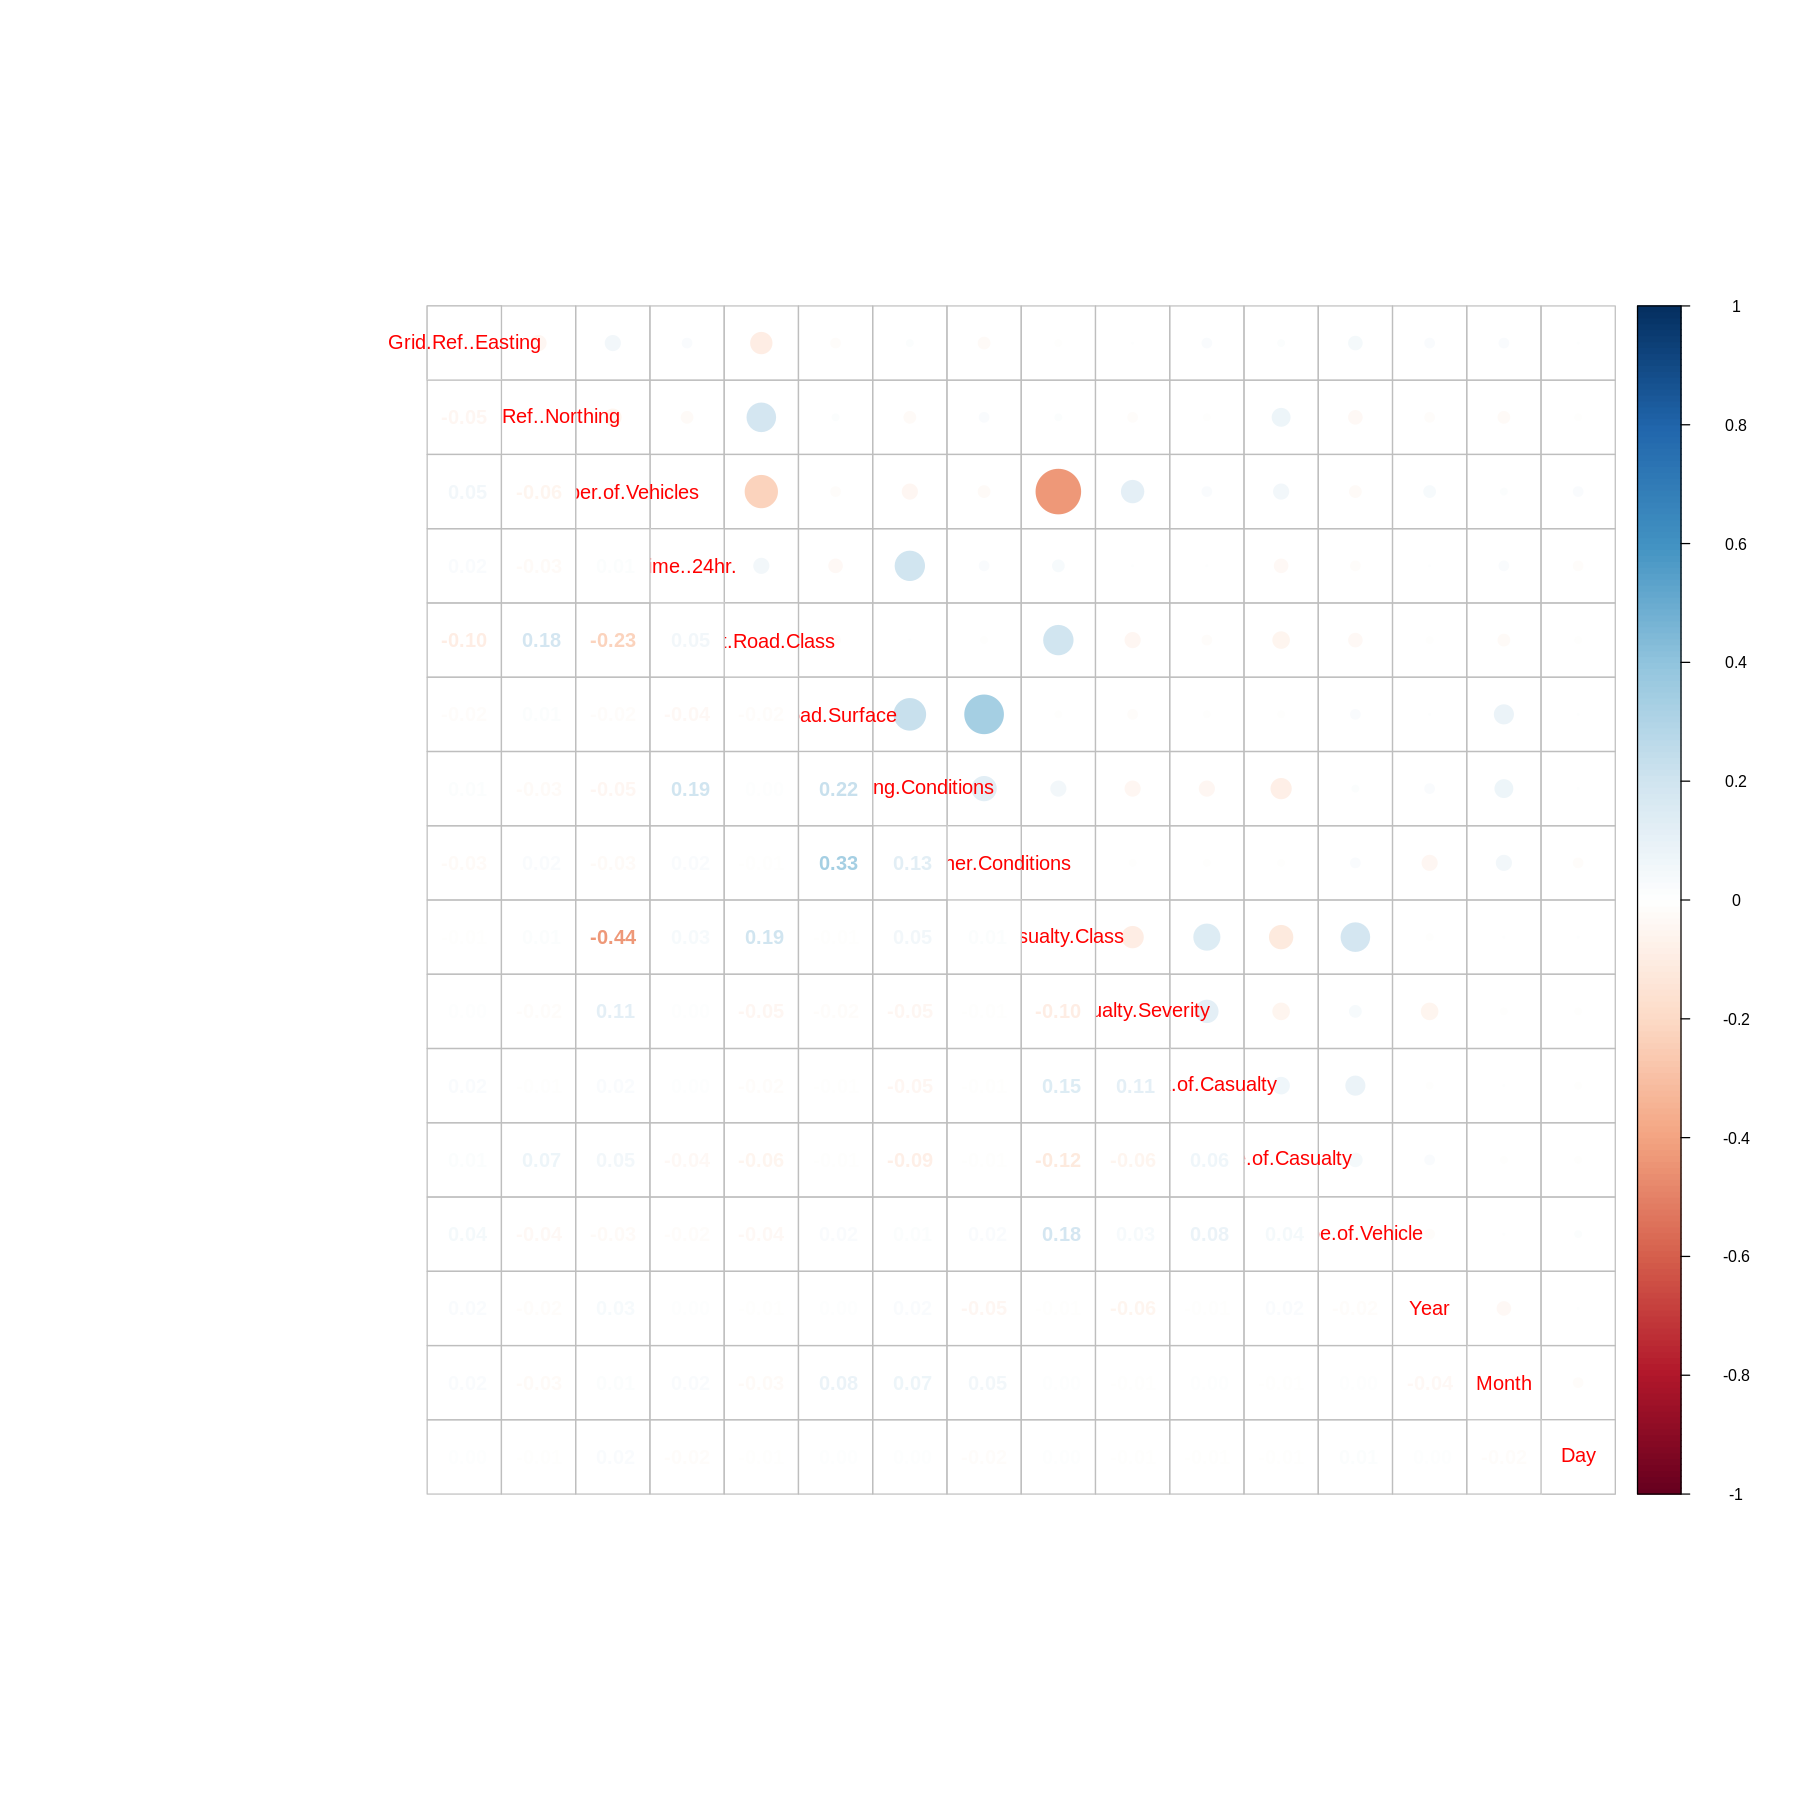

In [ ]:
# 상관관계 행렬 시각화
options(repr.plot.width=15, repr.plot.height=15)
corrplot.mixed(DF_Accident_cor)

## 가설설정

가설: 특정 도로 특성(도로 등급, 표면 상태 등)이 부상자의 심각도에 영향을 미칠 것이다. 예를 들어, 주로 높은 등급 도로에서는 사망사고 비율이 낮을 것으로 예상된다. </br>

*   귀무가설: 도로 특성(도로 등급, 표면 상태 등)이 부상자의 심각도에 영향을 미치지 않는다.
*   대립가설: 도로 특성(도로 등급, 표면 상태 등)이 부상자의 심각도에 영향을 미친다.
*   유의수준: 0.05 (통상적으로 쓰이는 수준)



In [129]:
install.packages("gmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
print("도로 표면 상태와 부상자의 심각도 연관 관계")
gmodels::CrossTable(DF_Accident_factor$`Road Surface`, DF_Accident_factor$`Casualty Severity`,
                    chisq = T, #카이제곱 검정
                    expected = T, #기대값(E) 표시
                    prop.r = F, prop.c = F) #각 셀의 비율 표시

[1] "도로 표면 상태와 부상자의 심각도 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  9096 

 
                                  | DF_Accident_factor$`Casualty Severity` 
DF_Accident_factor$`Road Surface` |         1 |         2 |         3 | Row Total | 
----------------------------------|-----------|-----------|-----------|-----------|
                                1 |        53 |       917 |      5660 |      6630 | 
                                  |    63.414 |   932.253 |  5634.334 |           | 
                                  |     1.710 |     0.250 |     0.117 |           | 
                                  |     0.006 |     0.101 |     0.622 |           | 
----------------------------------|-----------|-----------|-----------|-----------|
                                2 |        34 |       346 |      1962 |      2342 | 
                

In [ ]:
print("도로 등급과 부상자의 심각도 연관 관계")
gmodels::CrossTable(DF_Accident_factor$`1st Road Class`, DF_Accident_factor$`Casualty Severity`,
                    chisq = T, #카이제곱 검정
                    expected = T, #기대값(E) 표시
                    prop.r = F, prop.c = F) #각 셀의 비율 표시

[1] "도로 등급과 부상자의 심각도 연관 관계"


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  9096 

 
                                    | DF_Accident_factor$`Casualty Severity` 
DF_Accident_factor$`1st Road Class` |         1 |         2 |         3 | Row Total | 
------------------------------------|-----------|-----------|-----------|-----------|
                                  1 |         3 |        41 |       602 |       646 | 
                                    |     6.179 |    90.835 |   548.986 |           | 
                                    |     1.635 |    27.341 |     5.119 |           | 
                                    |     0.000 |     0.005 |     0.066 |           | 
------------------------------------|-----------|-----------|-----------|-----------|
                                  2 |         3 |        28 |       207 |       238 |

도로 표면상태와 부상자의 심각도는 'p =  0.3036957 '으로 연관이 있다고 하기는 힘들지만 도로 등급과 부상자의 심각도는 'p =  6.147565e-08'으로 연관이 있다.

## 회귀모델: 다중 로지스틱 회귀모델



In [ ]:
install.packages("nnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#다중 로지스틱 회귀를 실시하기 위한 라이브러리
library(nnet)

In [130]:
#시드값을 고정시켜 같은 결과를 얻는다.
set.seed(1234)

In [ ]:
index <- caret::createDataPartition(y = DF_Accident_factor$`Casualty Severity`, p = 0.9, list = FALSE)
Train_Accident <- DF_Accident_factor[index, ]
Test_Accident <- DF_Accident_factor[-index, ]

Train_Accident %>% show()
Test_Accident %>% show()

# A tibble: 8,188 × 16
   `Grid Ref: Easting` `Grid Ref: Northing` `Number of Vehicles` `Time (24hr)`
                 <int>                <int>                <int>         <int>
 1               14429                 8747                    2          1840
 2               15683                 7868                    3          1430
 3               15683                 7868                    3          1430
 4                9914                 4425                    3           817
 5                9914                 4425                    3           817
 6               18171                 2804                    2          1220
 7               17502                 3942                    3          1828
 8               11767                12502                    1          2000
 9                9366                 4923                    1          1531
10               15645                 7782                    4           824
# ℹ 8,178 more rows
# ℹ 12 mo

In [ ]:
#다중 로지스틱 회귀를 통해 학습한다.
print("다중 로지스틱 model Accident_Logistic")
Accident_Logistic <- multinom(`Casualty Severity` ~ `Road Surface` + `1st Road Class`, data = Train_Accident)
summary(Accident_Logistic)

[1] "다중 로지스틱 model Accident_Logistic"
# weights:  33 (20 variable)
initial  value 8995.437420 
iter  10 value 3862.991393
iter  20 value 3731.329535
iter  30 value 3727.988639
iter  40 value 3727.891469
final  value 3727.890516 
converged


Call:
multinom(formula = `Casualty Severity` ~ `Road Surface` + `1st Road Class`, 
    data = Train_Accident)

Coefficients:
  (Intercept) `Road Surface`2 `Road Surface`3 `Road Surface`4 `Road Surface`5
2    2.734318      -0.5481821        10.33871        11.98785        7.317642
3    5.393666      -0.6675479        10.75897        11.78614        7.154372
  `1st Road Class`2 `1st Road Class`3 `1st Road Class`4 `1st Road Class`5
2        -0.5933772        -0.1879576        -0.2214921          7.122554
3        -1.1614650        -0.9714233        -1.0462948          6.451371
  `1st Road Class`6
2         0.4363149
3        -0.5143302

Std. Errors:
  (Intercept) `Road Surface`2 `Road Surface`3 `Road Surface`4 `Road Surface`5
2   0.6064488       0.2388969       0.2636156       0.1746515        97.19612
3   0.5863063       0.2312163       0.2636158       0.1746516        97.19392
  `1st Road Class`2 `1st Road Class`3 `1st Road Class`4 `1st Road Class`5
2         0.8583409         0.6245720

In [ ]:
#역전파로 학습
Accident_Logistic_back <- step(Accident_Logistic, direction = "backward")

Start:  AIC=7495.78
`Casualty Severity` ~ `Road Surface` + `1st Road Class`

trying - `Road Surface` 
# weights:  21 (12 variable)
initial  value 8995.437420 
iter  10 value 3806.047809
iter  20 value 3734.781274
iter  30 value 3734.728832
final  value 3734.728562 
converged
trying - `1st Road Class` 
# weights:  18 (10 variable)
initial  value 8995.437420 
iter  10 value 3779.846063
iter  20 value 3752.579677
iter  30 value 3752.477295
iter  40 value 3752.352768
final  value 3752.352400 
converged
                   Df      AIC
- `Road Surface`   12 7493.457
<none>             20 7495.781
- `1st Road Class` 10 7524.705
# weights:  21 (12 variable)
initial  value 8995.437420 
iter  10 value 3806.047809
iter  20 value 3734.781274
iter  30 value 3734.728832
final  value 3734.728562 
converged

Step:  AIC=7493.46
`Casualty Severity` ~ `1st Road Class`

trying - `1st Road Class` 
# weights:  6 (2 variable)
initial  value 8995.437420 
iter  10 value 3759.348815
iter  10 value 3759.348781
it

In [ ]:
#역전파로 수정한 모델을 통해 Test set을 예측하기
predict_value <-
  predict(Accident_Logistic_back, Test_Accident) %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 908 × 1
   predict_value
   <fct>        
 1 3            
 2 3            
 3 3            
 4 3            
 5 3            
 6 3            
 7 3            
 8 3            
 9 3            
10 3            
# ℹ 898 more rows


In [ ]:
#이제 따로 내가 추측한 부분이 맞는지 확인한다.
combined_df <- cbind(Test_Accident, predict_value)
Accident_Logistic_result <- combined_df %>% select(c("Casualty Severity", "predict_value"))
head(Accident_Logistic_result)

,Casualty Severity,predict_value
,<fct>,<fct>
1,3,3
2,3,3
3,3,3
4,3,3
5,2,3
6,3,3


아래 confusionMatrix이 정상적으로 나오지 않았다.

In [ ]:
caret::confusionMatrix(Accident_Logistic_result$`Casualty Severity`, Accident_Logistic_result$predict_value)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   0   0   8
         2   0   0 127
         3   0   0 773

Overall Statistics
                                          
               Accuracy : 0.8513          
                 95% CI : (0.8265, 0.8738)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity                NA       NA   0.8513
Specificity          0.991189   0.8601       NA
Pos Pred Value             NA       NA       NA
Neg Pred Value             NA       NA       NA
Prevalence           0.000000   0.0000   1.0000
Detection Rate       0.000000   0.0000   0.8513
Detection Prevalence 0.008811   0.1399   0.8513
Balanced Accuracy          NA       NA   

그 이유는 아래의 결과로 설명할 수 있다.

In [ ]:
unique(Accident_Logistic_result$"Casualty Severity")
unique(Accident_Logistic_result$predict_value)

[1] 3 2 1
Levels: 1 2 3

[1] 3
Levels: 1 2 3

현재 데이터의 불균형으로 1에 대한 예측이 없어 아예 값이 0이되어 (/0)을 계산하지 못해 생긴 결측값들이다. 예를 들어, Specificity = TN / (TN+FP) 인데 여기서 FP가 0이기 떄문에 측정하지 못했기 때문이다.

## 분류모델: Decision Tree

In [ ]:
table(Train_Accident$`Casualty Severity`)


   1    2    3 
  79 1152 6957 

In [ ]:
#데이터의 불균형으로 결정트리에서 정상적인 학습이 일어나지 않는다.
#그렇기에 가중치를 주는 방법으로 학습한다.
weights <- rep(1, nrow(Train_Accident))
weights[Train_Accident$`Casualty Severity` == 1] <- 20
weights[Train_Accident$`Casualty Severity` == 2] <- 7

In [ ]:
# Decision Tree 모델 학습
Accident_DecisionTree_iwant <- rpart(formula = `Casualty Severity` ~ `Road Surface` + `1st Road Class`,
                                         data = Train_Accident,
                                         method = "class",
                                         weights = weights)

# 모델 요약
summary(Accident_DecisionTree_iwant)

#가중치를 주어도 학습할수 없다..

Call:
rpart(formula = `Casualty Severity` ~ `Road Surface` + `1st Road Class`, 
    data = Train_Accident, weights = weights, method = "class")
  n= 8188 

          CP nsplit rel error    xerror        xstd
1 0.03127562      0 1.0000000 1.0000000 0.007543198
2 0.01000000      1 0.9687244 0.9764554 0.007546192

Variable importance
1st Road Class 
           100 

Node number 1: 8188 observations,    complexity param=0.03127562
  predicted class=2  expected loss=0.5142461  P(node) =1
    class counts:  1580  8064  6957
   probabilities: 0.095 0.486 0.419 
  left son=2 (7606 obs) right son=3 (582 obs)
  Primary splits:
      1st Road Class splits as  RLLLLL, improve=64.90413, (0 missing)
      Road Surface   splits as  RLRRR,  improve=21.42925, (0 missing)

Node number 2: 7606 observations
  predicted class=2  expected loss=0.5046414  P(node) =0.9474128
    class counts:  1520  7791  6417
   probabilities: 0.097 0.495 0.408 

Node number 3: 582 observations
  predicted class=3  expected 

In [ ]:
# Decision Tree 모델 학습
Accident_DecisionTree <- rpart(formula = `Casualty Severity` ~ .,
                                         data = Train_Accident,
                                         method = "class",
                                         weights = weights)

# 모델 요약
summary(Accident_DecisionTree)

Call:
rpart(formula = `Casualty Severity` ~ ., data = Train_Accident, 
    weights = weights, method = "class")
  n= 8188 

          CP nsplit rel error    xerror        xstd
1 0.11959705      0 1.0000000 1.0000000 0.007543198
2 0.01733630      2 0.7608059 0.7627972 0.007369005
3 0.01616493      4 0.7261333 0.7501464 0.007346652
4 0.01000000      5 0.7099684 0.7191051 0.007285909

Variable importance
    Casualty Class    Type of Vehicle Number of Vehicles    Age of Casualty 
                29                 26                 15                 12 
Weather Conditions        Time (24hr)  Grid Ref: Easting Grid Ref: Northing 
                 8                  7                  1                  1 

Node number 1: 8188 observations,    complexity param=0.119597
  predicted class=2  expected loss=0.5142461  P(node) =1
    class counts:  1580  8064  6957
   probabilities: 0.095 0.486 0.419 
  left son=2 (1784 obs) right son=3 (6404 obs)
  Primary splits:
      Type of Vehicle    spl

In [ ]:
library(RColorBrewer)

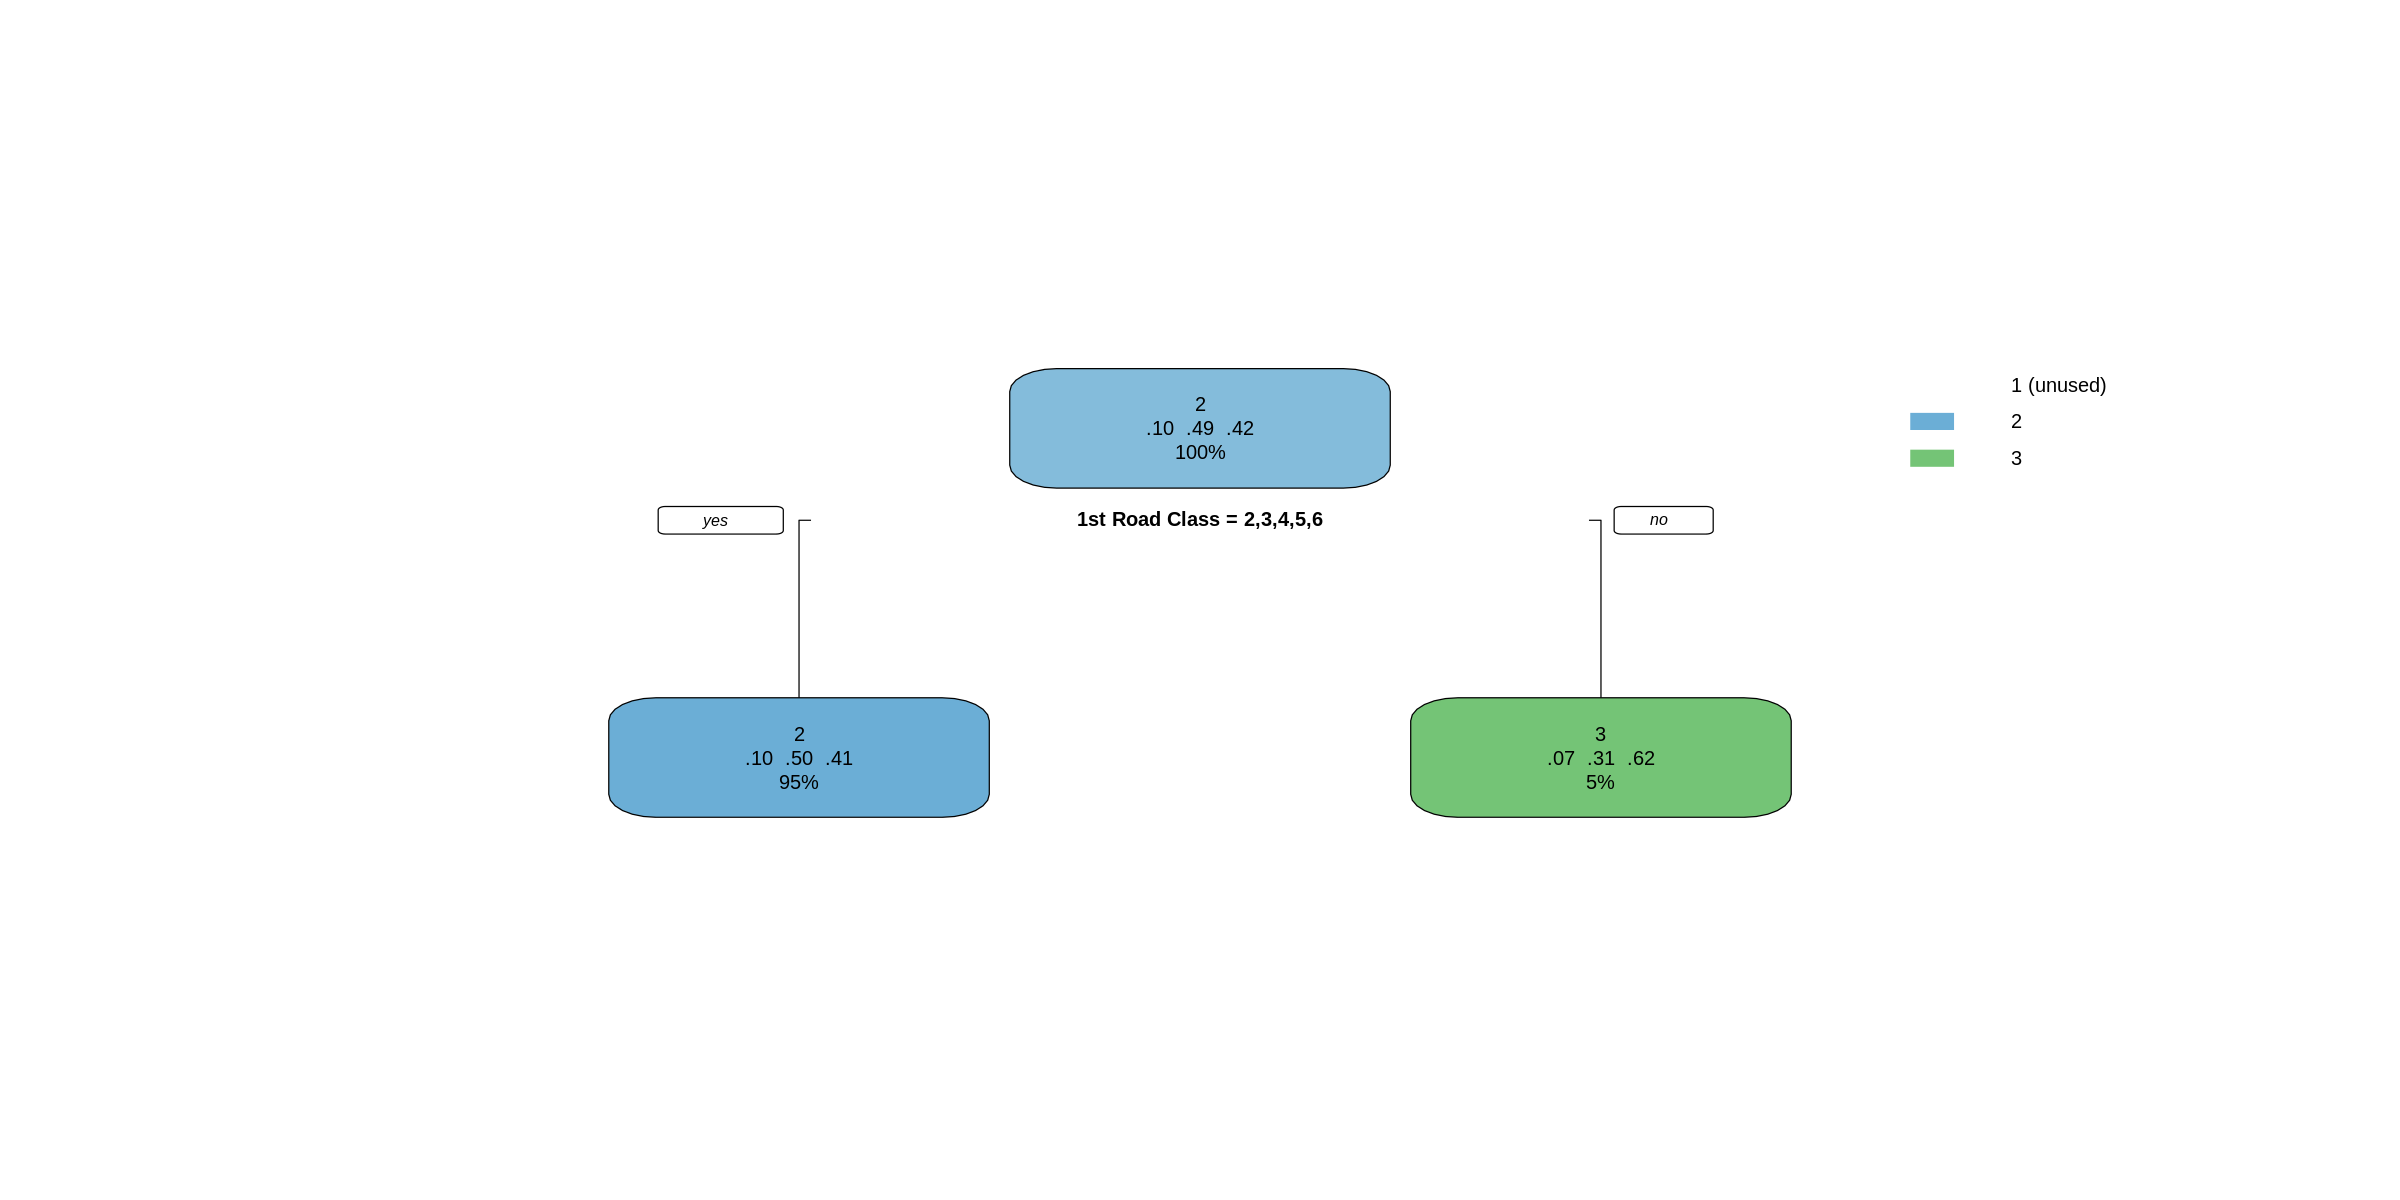

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
rpart.plot(Accident_DecisionTree_iwant)

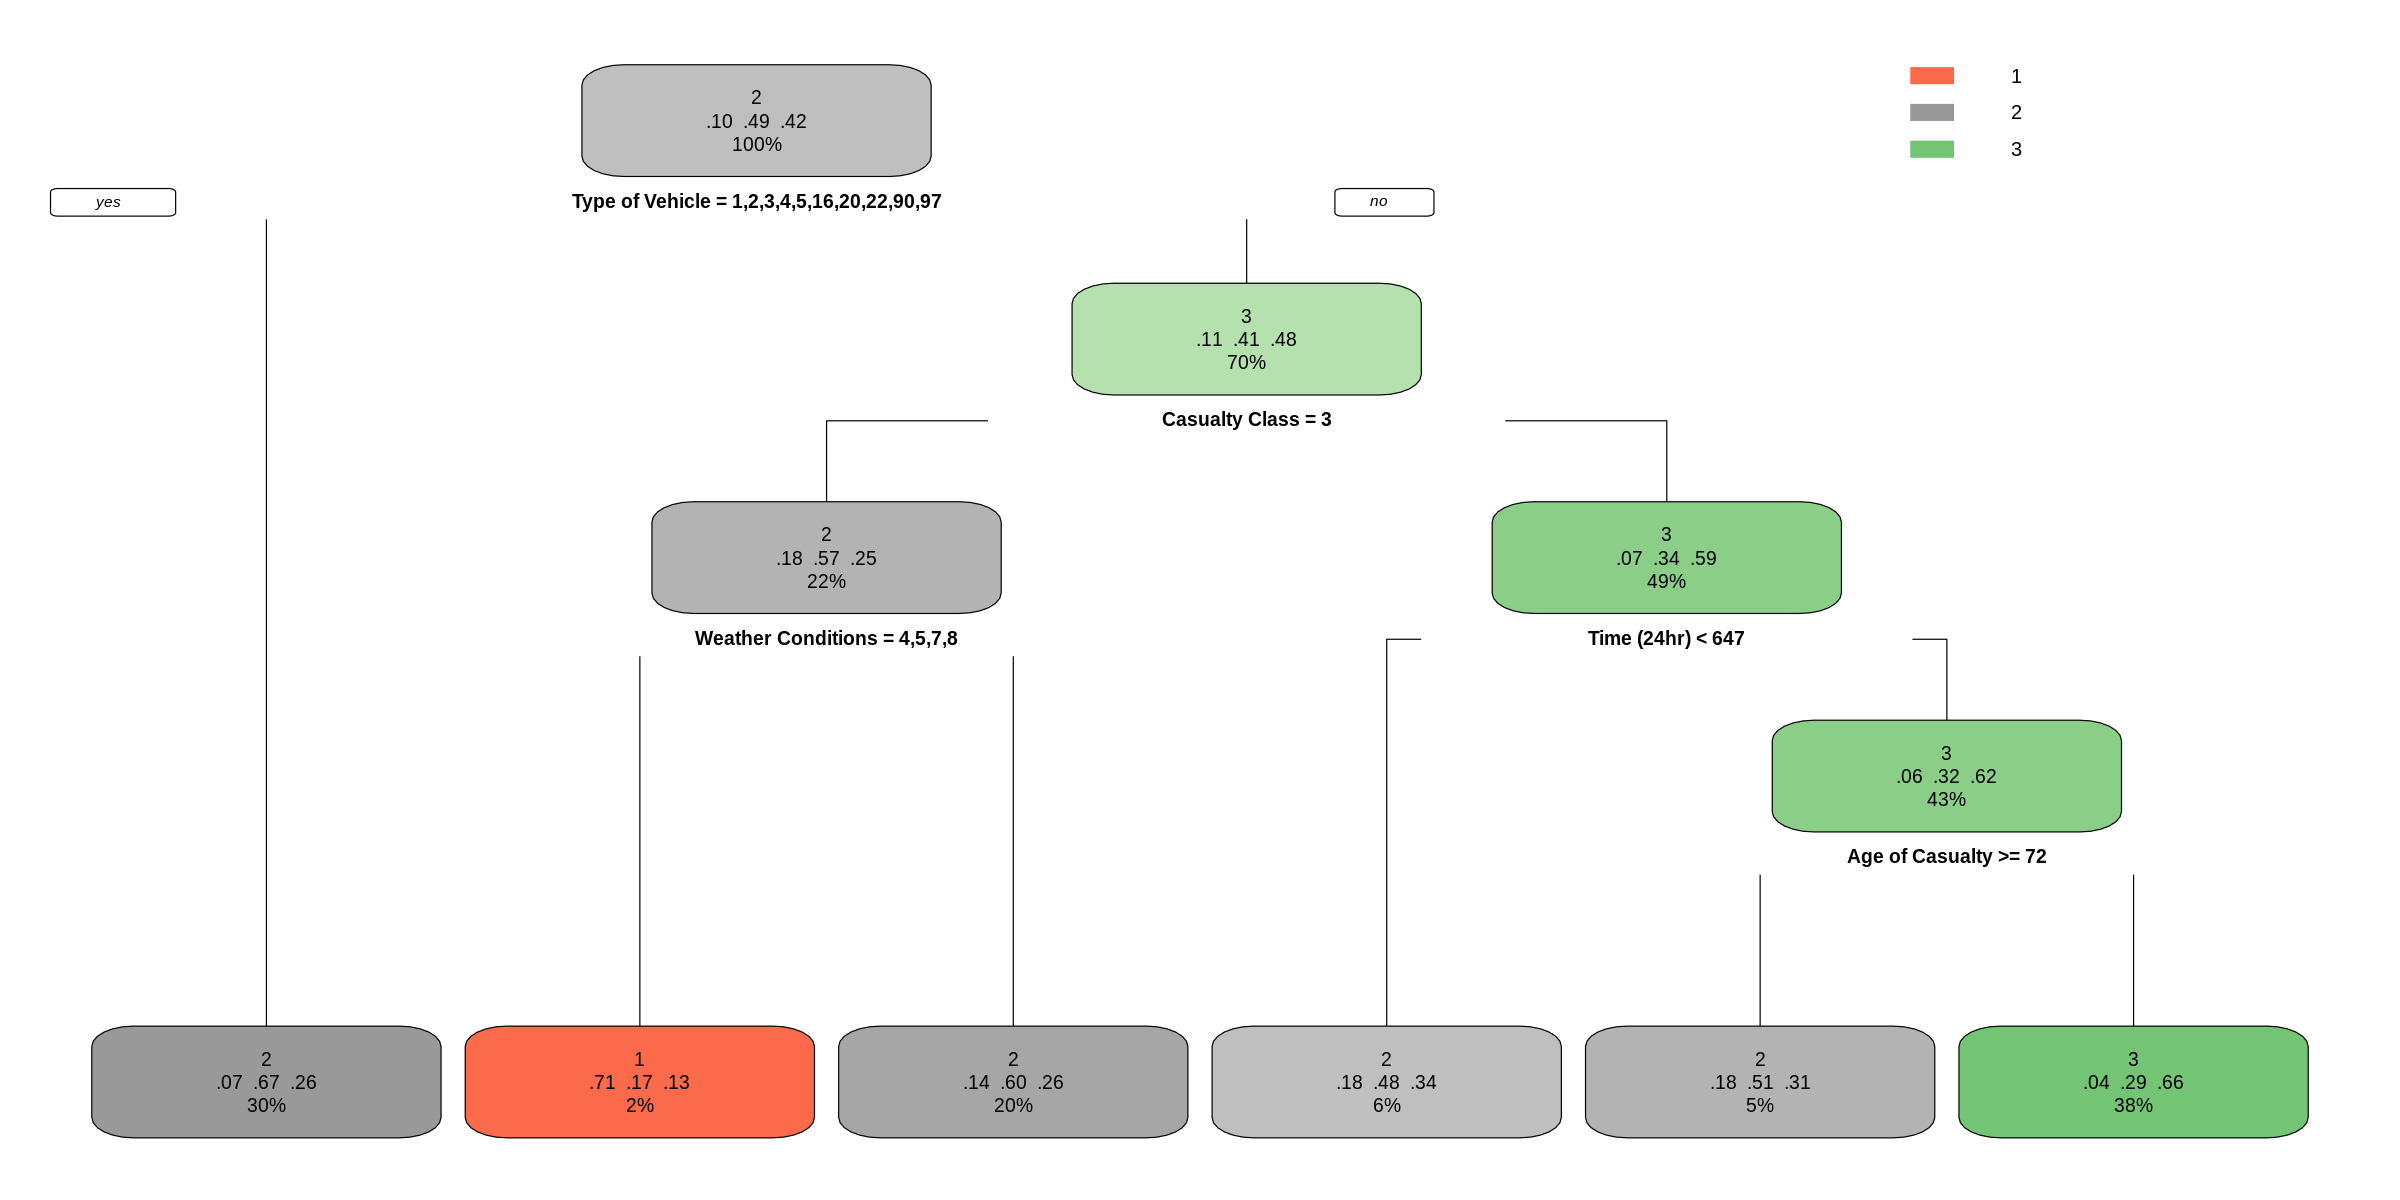

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
rpart.plot(Accident_DecisionTree)

가중치를 주어 어느정도 분류된것처럼 보이지만 사실상 분류 성능이 크게 뛰어나지는 않다. 내가 원하는 특징으로는 전혀 분류가 되지 않았고 전체 특징 중 일부를 사용해야 했다.

In [ ]:
predict_value <- predict(Accident_DecisionTree_iwant, Test_Accident, type = "class") %>% tibble(predict_value = .)

combined_df <- cbind(Test_Accident, predict_value)
Accident_DecisionTree_result <- combined_df %>% select(c("Casualty Severity", "predict_value"))
head(Accident_DecisionTree_result)

,Casualty Severity,predict_value
,<fct>,<fct>
1,3,2
2,3,2
3,3,2
4,3,2
5,2,2
6,3,2


In [ ]:
caret::confusionMatrix(Accident_DecisionTree_result$`Casualty Severity`, Accident_DecisionTree_result$predict_value)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   0   8   0
         2   0 125   2
         3   0 711  62

Overall Statistics
                                          
               Accuracy : 0.2059          
                 95% CI : (0.1801, 0.2337)
    No Information Rate : 0.9295          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0197          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity                NA  0.14810  0.96875
Specificity          0.991189  0.96875  0.15758
Pos Pred Value             NA  0.98425  0.08021
Neg Pred Value             NA  0.07939  0.98519
Prevalence           0.000000  0.92952  0.07048
Detection Rate       0.000000  0.13767  0.06828
Detection Prevalence 0.008811  0.13987  0.85132
Balanced Accuracy          NA  0.55843  0

가중치를 너무 심하게 주어 정확도가 매우 낮아졌고 Kappa값이 1.97%로 모델 성능이 매우 낮다. 가중치를 뺴고 학습하자니 학습이 안된다.

## 분류모델: Random Forest

fomula에서 띄어쓰기가 있는 경우 에러가 생겨 열 이름들을 전부 바꿔주었다.

In [ ]:
# 열 이름에 있는 공백과 콜론(:)을 언더스코어로 대체
names(Train_Accident) <- make.names(gsub(" ", "_", names(Train_Accident)))
names(Train_Accident) <- make.names(gsub(":", "", names(Train_Accident)))

# randomForest 실행
Accident_RandomForest <- randomForest(Casualty_Severity ~ ., data = Train_Accident, ntree = 1000)

In [ ]:
# 열 이름에 있는 공백과 콜론(:)을 언더스코어로 대체
names(Test_Accident) <- make.names(gsub(" ", "_", names(Test_Accident)))
names(Test_Accident) <- make.names(gsub(":", "", names(Test_Accident)))

In [ ]:
predict_value <- predict(Accident_RandomForest, Test_Accident, type = "class") %>% tibble(predict_value = .)

combined_df <- cbind(Test_Accident, predict_value)
Accident_RandomForest_result <- combined_df %>% select(c("Casualty_Severity", "predict_value"))
head(Accident_RandomForest_result)

,Casualty_Severity,predict_value
,<fct>,<fct>
1,3,3
2,3,3
3,3,3
4,3,3
5,2,2
6,3,3


In [ ]:
caret::confusionMatrix(Accident_RandomForest_result$`Casualty_Severity`, Accident_RandomForest_result$predict_value)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   1   3   4
         2   0  13 114
         3   0   9 764

Overall Statistics
                                         
               Accuracy : 0.8568         
                 95% CI : (0.8323, 0.879)
    No Information Rate : 0.9714         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1538         
                                         
 Mcnemar's Test P-Value : <2e-16         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity          1.000000  0.52000   0.8662
Specificity          0.992282  0.87089   0.6538
Pos Pred Value       0.125000  0.10236   0.9884
Neg Pred Value       1.000000  0.98464   0.1259
Prevalence           0.001101  0.02753   0.9714
Detection Rate       0.001101  0.01432   0.8414
Detection Prevalence 0.008811  0.13987   0.8513
Balanced Accuracy    0.996141  0.69545   0.7600

드디어 첫번째로 정상적인 예측을 성공했다! Fatal을 너무 많이 예측해서 성능이 생각보다 많이 낮다. Kappa : 0.1538으로 매우 낮아 모델의 성능이 뛰어나다고 할 수 없다.

아래는 도로 등급과 표면 상태 특징을 이용한 분류이다.

In [ ]:
Accident_RandomForest <- randomForest(Casualty_Severity ~ Road_Surface + X1st_Road_Class, data = Train_Accident, ntree = 1000)

In [ ]:
predict_value <- predict(Accident_RandomForest, Test_Accident, type = "class") %>% tibble(predict_value = .)

combined_df <- cbind(Test_Accident, predict_value)
Accident_RandomForest_result <- combined_df %>% select(c("Casualty_Severity", "predict_value"))
head(Accident_RandomForest_result)

,Casualty_Severity,predict_value
,<fct>,<fct>
1,3,3
2,3,3
3,3,3
4,3,3
5,2,3
6,3,3


In [ ]:
caret::confusionMatrix(Accident_RandomForest_result$`Casualty_Severity`, Accident_RandomForest_result$predict_value)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   0   0   8
         2   0   0 127
         3   0   0 773

Overall Statistics
                                          
               Accuracy : 0.8513          
                 95% CI : (0.8265, 0.8738)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity                NA       NA   0.8513
Specificity          0.991189   0.8601       NA
Pos Pred Value             NA       NA       NA
Neg Pred Value             NA       NA       NA
Prevalence           0.000000   0.0000   1.0000
Detection Rate       0.000000   0.0000   0.8513
Detection Prevalence 0.008811   0.1399   0.8513
Balanced Accuracy          NA       NA   

도로 등급과 표면 상태 특징을 이용한 분류는 완벽한 실패이다. kappa가 0으로 해당 모델은 완전한 Random 모델과 성능이 차이가 없으며 모든 값을 그저 3으로 분류하는 모델이 탄생했다.

## 분류모델: SVM

가장 먼저 최적의 gamma와 cost값을 탐색한다.

In [ ]:
tuned <- e1071::tune.svm(Casualty_Severity~., data=Train_Accident, gamma=10^(-8:1), cost=1:10)

summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
    10    6

- best performance: 0.1496089 

- Detailed performance results:
    gamma cost     error  dispersion
1   1e-08    1 0.1503414 0.008516086
2   1e-07    1 0.1503414 0.008516086
3   1e-06    1 0.1503414 0.008516086
4   1e-05    1 0.1503414 0.008516086
5   1e-04    1 0.1503414 0.008516086
6   1e-03    1 0.1503414 0.008516086
7   1e-02    1 0.1503414 0.008516086
8   1e-01    1 0.1504635 0.008522317
9   1e+00    1 0.1498533 0.007868869
10  1e+01    1 0.1502196 0.007866396
11  1e-08    2 0.1503414 0.008516086
12  1e-07    2 0.1503414 0.008516086
13  1e-06    2 0.1503414 0.008516086
14  1e-05    2 0.1503414 0.008516086
15  1e-04    2 0.1503414 0.008516086
16  1e-03    2 0.1503414 0.008516086
17  1e-02    2 0.1503414 0.008516086
18  1e-01    2 0.1499749 0.007810910
19  1e+00    2 0.1531507 0.007095700
20  1e+01    2 0.1497312 0.007121925
21  1e-08    3 0.1503414 0.008516086
22 

최적인 gamma와 cost값이 무엇인지 확인한다.

In [ ]:
best_param <- summary(tuned)$best.parameters
best_param #best_param[1,1] == gamma / best_param[1:2] == cost

,gamma,cost
,<dbl>,<int>
60,10,6


최적의 gamma는 10, cost는 6이다. </br>
해당 최적의 파라미터를 가지고 SVM으로 데이터를 분류해보자.

In [ ]:
SVM_Best_Accident <- e1071::svm(Casualty_Severity~., data = Train_Accident, type = "C-classification", kernel = "radial", gamma = best_param[1,1], cost = best_param[1,2])

summary(SVM_Best_Accident)


Call:
svm(formula = Casualty_Severity ~ ., data = Train_Accident, type = "C-classification", 
    kernel = "radial", gamma = best_param[1, 1], cost = best_param[1, 
        2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  6 

Number of Support Vectors:  8118

 ( 6891 1149 78 )


Number of Classes:  3 

Levels: 
 1 2 3




모델을 이용한 테스트 데이터의 예측과 기존 정답과 비교를 위해 비교 데이터 프레임을 만든다.

In [ ]:
predict_value <- predict(SVM_Best_Accident, Test_Accident, type = "class") %>% tibble(predict_value = .)

combined_df <- cbind(Test_Accident, predict_value)
SVM_Best_Accident_result <- combined_df %>% select(c("Casualty_Severity", "predict_value"))
head(SVM_Best_Accident_result)

,Casualty_Severity,predict_value
,<fct>,<fct>
1,3,3
2,3,3
3,3,3
4,3,3
5,2,3
6,3,3


모델의 성능을 확인한다.

In [ ]:
caret::confusionMatrix(SVM_Best_Accident_result$`Casualty_Severity`, SVM_Best_Accident_result$predict_value)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   1   1   6
         2   0   0 127
         3   0   1 772

Overall Statistics
                                          
               Accuracy : 0.8513          
                 95% CI : (0.8265, 0.8738)
    No Information Rate : 0.9967          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0165          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity          1.000000 0.000000  0.85304
Specificity          0.992282 0.859823  0.66667
Pos Pred Value       0.125000 0.000000  0.99871
Neg Pred Value       1.000000 0.997439  0.01481
Prevalence           0.001101 0.002203  0.99670
Detection Rate       0.001101 0.000000  0.85022
Detection Prevalence 0.008811 0.139868  0.85132
Balanced Accuracy    0.996141 0.429912  0

2를 아예 예측하지 못했다. 최적의 파라미터로 학습을 헀는데도 kappa수치가 1.65%로 매우 낮아 해당 모델도 성능이 매우 낮았다.

아래는 도로 등급과 표면 상태 특징을 이용한 분류이다.

In [ ]:
tuned <- e1071::tune.svm(Casualty_Severity~Road_Surface + X1st_Road_Class, data=Train_Accident, gamma=10^(-8:1), cost=1:10)

summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 1e-08    1

- best performance: 0.1503418 

- Detailed performance results:
    gamma cost     error  dispersion
1   1e-08    1 0.1503418 0.009809062
2   1e-07    1 0.1503418 0.009809062
3   1e-06    1 0.1503418 0.009809062
4   1e-05    1 0.1503418 0.009809062
5   1e-04    1 0.1503418 0.009809062
6   1e-03    1 0.1503418 0.009809062
7   1e-02    1 0.1503418 0.009809062
8   1e-01    1 0.1503418 0.009809062
9   1e+00    1 0.1503418 0.009809062
10  1e+01    1 0.1505860 0.009902178
11  1e-08    2 0.1503418 0.009809062
12  1e-07    2 0.1503418 0.009809062
13  1e-06    2 0.1503418 0.009809062
14  1e-05    2 0.1503418 0.009809062
15  1e-04    2 0.1503418 0.009809062
16  1e-03    2 0.1503418 0.009809062
17  1e-02    2 0.1503418 0.009809062
18  1e-01    2 0.1503418 0.009809062
19  1e+00    2 0.1505860 0.009902178
20  1e+01    2 0.1505860 0.009902178
21  1e-08    3 0.1503418 0.009809062
22 

In [ ]:
best_param <- summary(tuned)$best.parameters
best_param #best_param[1,1] == gamma / best_param[1:2] == cost

,gamma,cost
,<dbl>,<int>
1,1e-08,1


In [ ]:
svm_best <- e1071::svm(Casualty_Severity~Road_Surface + X1st_Road_Class, data = Train_Accident, type = "C-classification", kernel = "radial", gamma = best_param[1,1], cost = best_param[1,2])

summary(svm_best)


Call:
svm(formula = Casualty_Severity ~ Road_Surface + X1st_Road_Class, 
    data = Train_Accident, type = "C-classification", kernel = "radial", 
    gamma = best_param[1, 1], cost = best_param[1, 2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2389

 ( 1158 1152 79 )


Number of Classes:  3 

Levels: 
 1 2 3




In [ ]:
predict_value <- predict(svm_best, Test_Accident, type = "class") %>% tibble(predict_value = .)

combined_df <- cbind(Test_Accident, predict_value)
svm_best_result <- combined_df %>% select(c("Casualty_Severity", "predict_value"))
head(svm_best_result)

,Casualty_Severity,predict_value
,<fct>,<fct>
1,3,3
2,3,3
3,3,3
4,3,3
5,2,3
6,3,3


In [ ]:
caret::confusionMatrix(svm_best_result$`Casualty_Severity`, svm_best_result$predict_value)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1   0   0   8
         2   0   0 127
         3   0   0 773

Overall Statistics
                                          
               Accuracy : 0.8513          
                 95% CI : (0.8265, 0.8738)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity                NA       NA   0.8513
Specificity          0.991189   0.8601       NA
Pos Pred Value             NA       NA       NA
Neg Pred Value             NA       NA       NA
Prevalence           0.000000   0.0000   1.0000
Detection Rate       0.000000   0.0000   0.8513
Detection Prevalence 0.008811   0.1399   0.8513
Balanced Accuracy          NA       NA   

# 심부전 데이터



In [1]:
system("gdown --id 1i1Q_MTnm7UdlLB_M0ja9iue3QU1KjEb2")
system("ls", TRUE)

[1] "heart_failure_clinical_records_dataset.csv"
[2] "sample_data"

In [4]:
DFHeart <- fread("/content/heart_failure_clinical_records_dataset.csv", header = T, encoding = "UTF-8") %>% as_tibble()

## 데이터 전처리

해당 데이터는 Kaggle의 데이터로 대부분의 전처리가 끝난 데이터이다. 각 데이터는 아래와 같은 의미를 포함한다.


1. age: 환자의 나이
2. anaemia: 빈혈 여부 (0: 빈혈이 아님, 1: 빈혈)
3. creatinine_phosphokinase: 크레아틴키나제 수치
4. diabetes: 당뇨병 여부 (0: 당뇨병이 아님, 1: 당뇨병)
5. ejection_fraction: 심장 펌프 기능의 백분율
6. high_blood_pressure: 고혈압 여부 (0: 고혈압이 아님, 1: 고혈압)
7. platelets: 혈소판 수치
8. serum_creatinine: 혈중 크레아틴 수치
9. serum_sodium: 혈중 나트륨 수치
10. sex: 성별 (0: 여성, 1: 남성)
11. smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
12. time: 관찰 시간
13. DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [5]:
str(DFHeart)

tibble [299 × 13] (S3: tbl_df/tbl/data.frame)
 $ age                     : num [1:299] 75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int [1:299] 0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int [1:299] 582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int [1:299] 0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int [1:299] 20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int [1:299] 1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num [1:299] 265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num [1:299] 1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int [1:299] 130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int [1:299] 1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int [1:299] 0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int [1:299] 4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int [1:299] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*,

### 결측값 확인

In [6]:
table(is.na(DFHeart))


FALSE 
 3887 

결측값이 존재하지 않는다.

### 이상값 처리

In [7]:
summary(DFHeart)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

0,1로 구분된 데이터에는 이상값이 없을 것이다.

여기서 혈소판와 크레아틴키나제의 최소값과 평균의 차이, 최대값과 평균의 차이가 너무 크다. log 스케일을 사용하여 차이를 줄일 것이다.

In [8]:
# 로그 스케일 적용
DFHeart$log_creatinine_phosphokinase <- round(log(DFHeart$creatinine_phosphokinase), 3)
DFHeart$log_platelets <- round(log(DFHeart$platelets), 3)

# 결과 확인
summary(DFHeart)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

로그 스케일을 적용하니 혈소판의 크기가 줄어들었고 너무 들쭉날쭉하던 데이터가 어느정도 규칙있게 배치되었다.

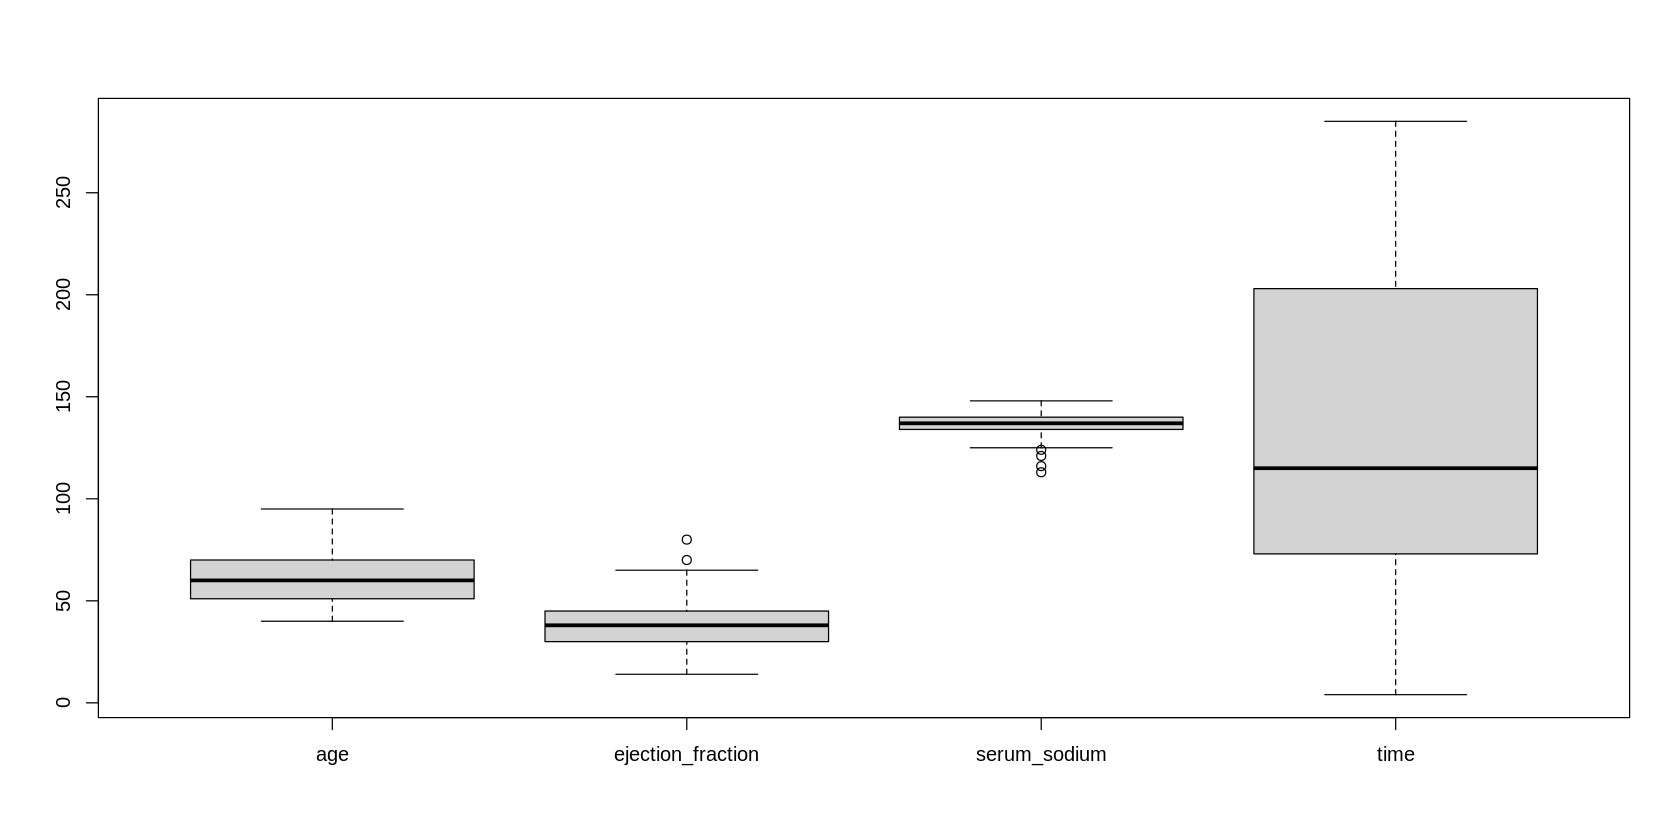

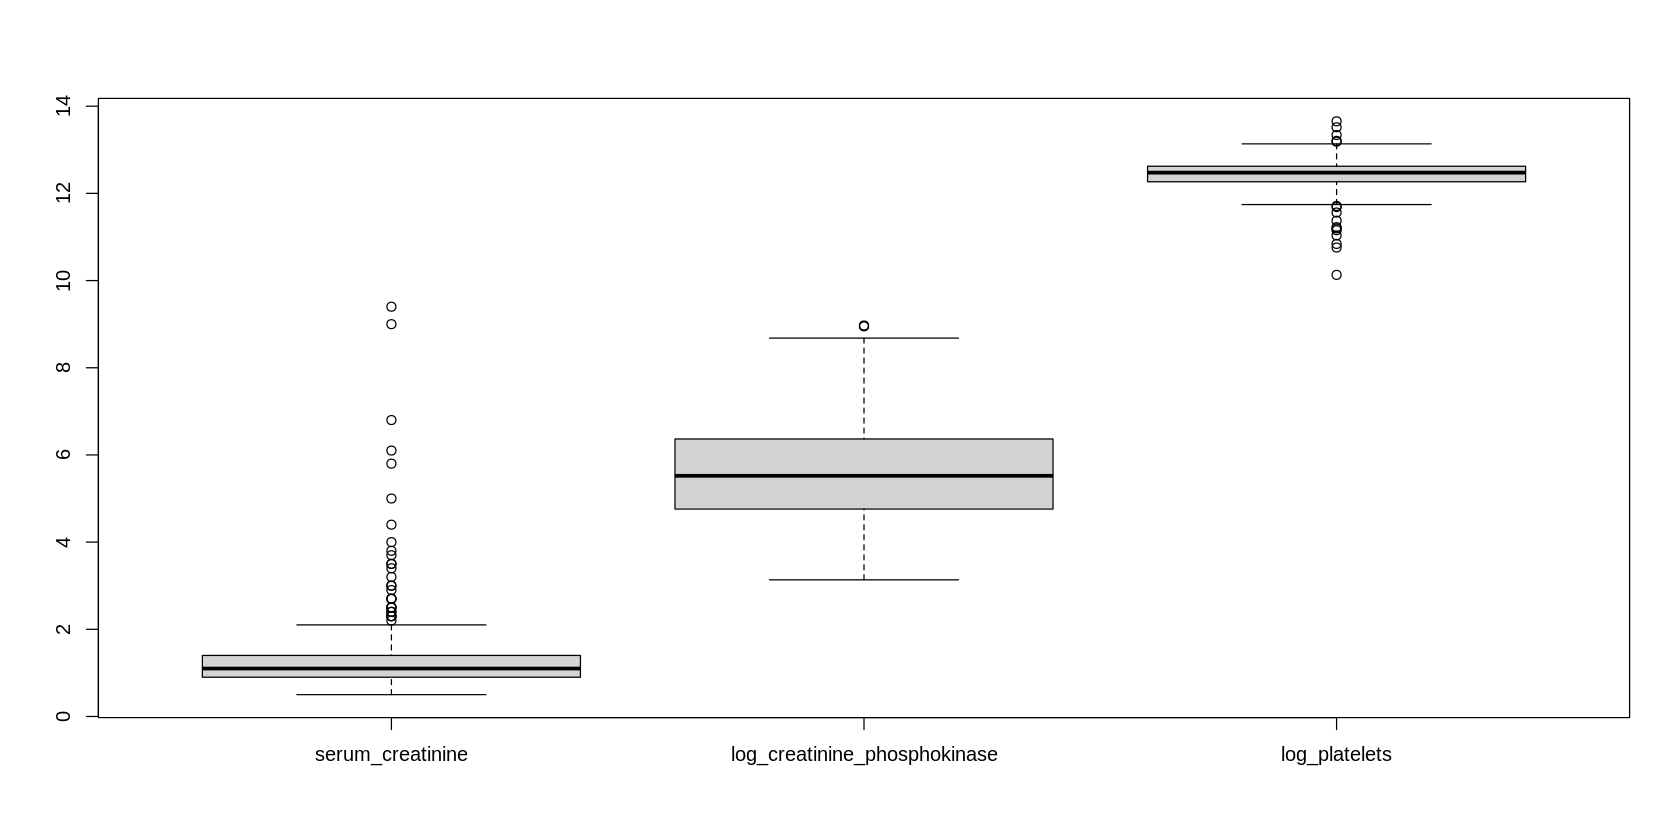

In [9]:
options(repr.plot.width = 14, repr.plot.height = 7)
DFHeart %>% select(c(age, ejection_fraction, serum_sodium, time)) %>% boxplot()
DFHeart %>% select(c(serum_creatinine, log_creatinine_phosphokinase, log_platelets)) %>% boxplot()

혈중 크레아틴 수치(serum_creatinine)를 제외하곤 각 데이터들의 이상값은 감안할수 있는 정도의 수치이다. 로그 스케일을 적용한 혈소판의 수치의 경우 원래 이상값은 전부 엄청 수치가 큰 값들이었으나 해당 값들에 로그가 적용되어 대부분의 값이 12로 몰리고 생각보다 값의 분포가 적당하다고 생각한다.

혈중 크레아틴 수치(serum_creatinine)에도 로그 스케일을 적용하면 어떻게 될지 확인해 보았다.

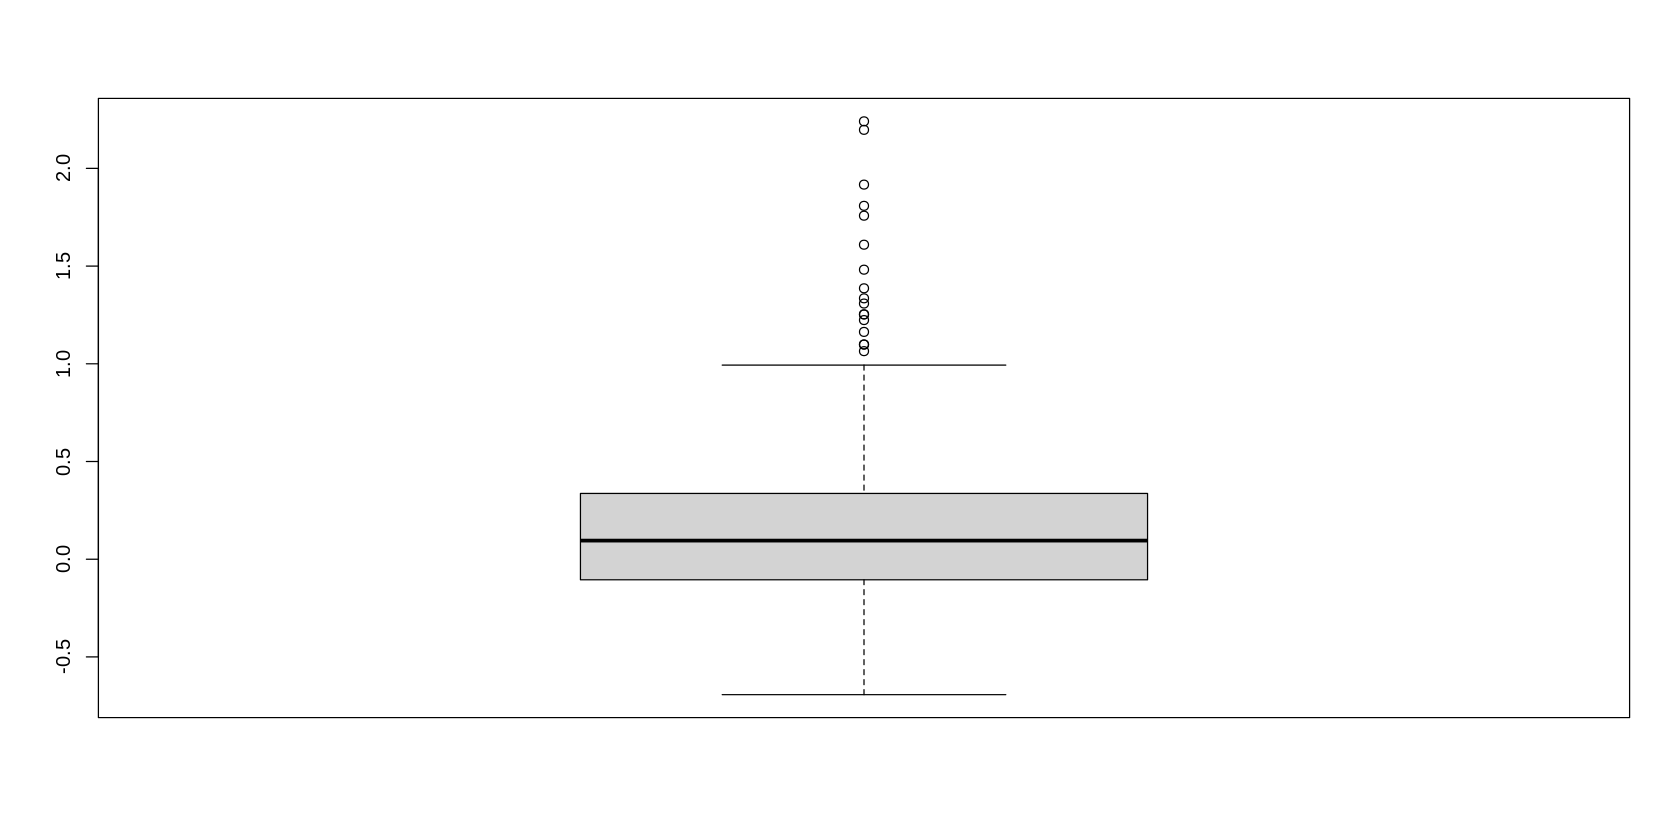

In [10]:
# 로그 스케일 적용
DFHeart$log_serum_creatinine <- log(DFHeart$serum_creatinine)

# 결과 확인
DFHeart %>% select(log_serum_creatinine) %>% boxplot()

기존과 큰 차이가 없어 그대로 사용하기로 결정했고 이상값을 제거하기에는 데이터수가 약 300개로 너무 적다고 생각해 처리하지 않고 사용하기로 했다.

In [11]:
#로그 스케일을 적용하기 전의 데이터와 사용하지 않기로 결정한 데이터를 삭제한다.
#로그 스케일 값을 사용할 column : creatinine_phosphokinase, platelets
#로그 스케일 값을 사용하지 않을 column : serum_creatinine
DFHeart <- select(DFHeart, -c(log_serum_creatinine, creatinine_phosphokinase, platelets))

### 데이터 표준화

학습을 할 값들의 평균값을 빼고 표준편차로 나눠 전체적인 데이터 값을 표준화하기로 했다.

In [12]:
DFHeart$log_creatinine_phosphokinase <- (DFHeart$log_creatinine_phosphokinase - mean(DFHeart$log_creatinine_phosphokinase)) / sd(DFHeart$serum_sodium)
DFHeart$log_platelets <- (DFHeart$log_platelets - mean(DFHeart$log_platelets)) / sd(DFHeart$serum_sodium)
DFHeart$serum_sodium <- (DFHeart$serum_sodium - mean(DFHeart$serum_sodium)) / sd(DFHeart$serum_sodium)
DFHeart$serum_creatinine <- (DFHeart$serum_creatinine - mean(DFHeart$serum_creatinine)) / sd(DFHeart$serum_sodium)

마지막으로 factor 형으로 바꿔야하는것들을 factor형으로 바꿔준다.

In [13]:
DFHeart <- DFHeart %>%  mutate_at(c("anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"), factor)

## 데이터 시각화



In [14]:
library(corrr)

In [15]:
#상관관계를 출력하기 위해 데이터를 가공한다.
DFHeart_cor <- as.data.frame(lapply(DFHeart, as.numeric)) %>% cor() %>% round(2)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


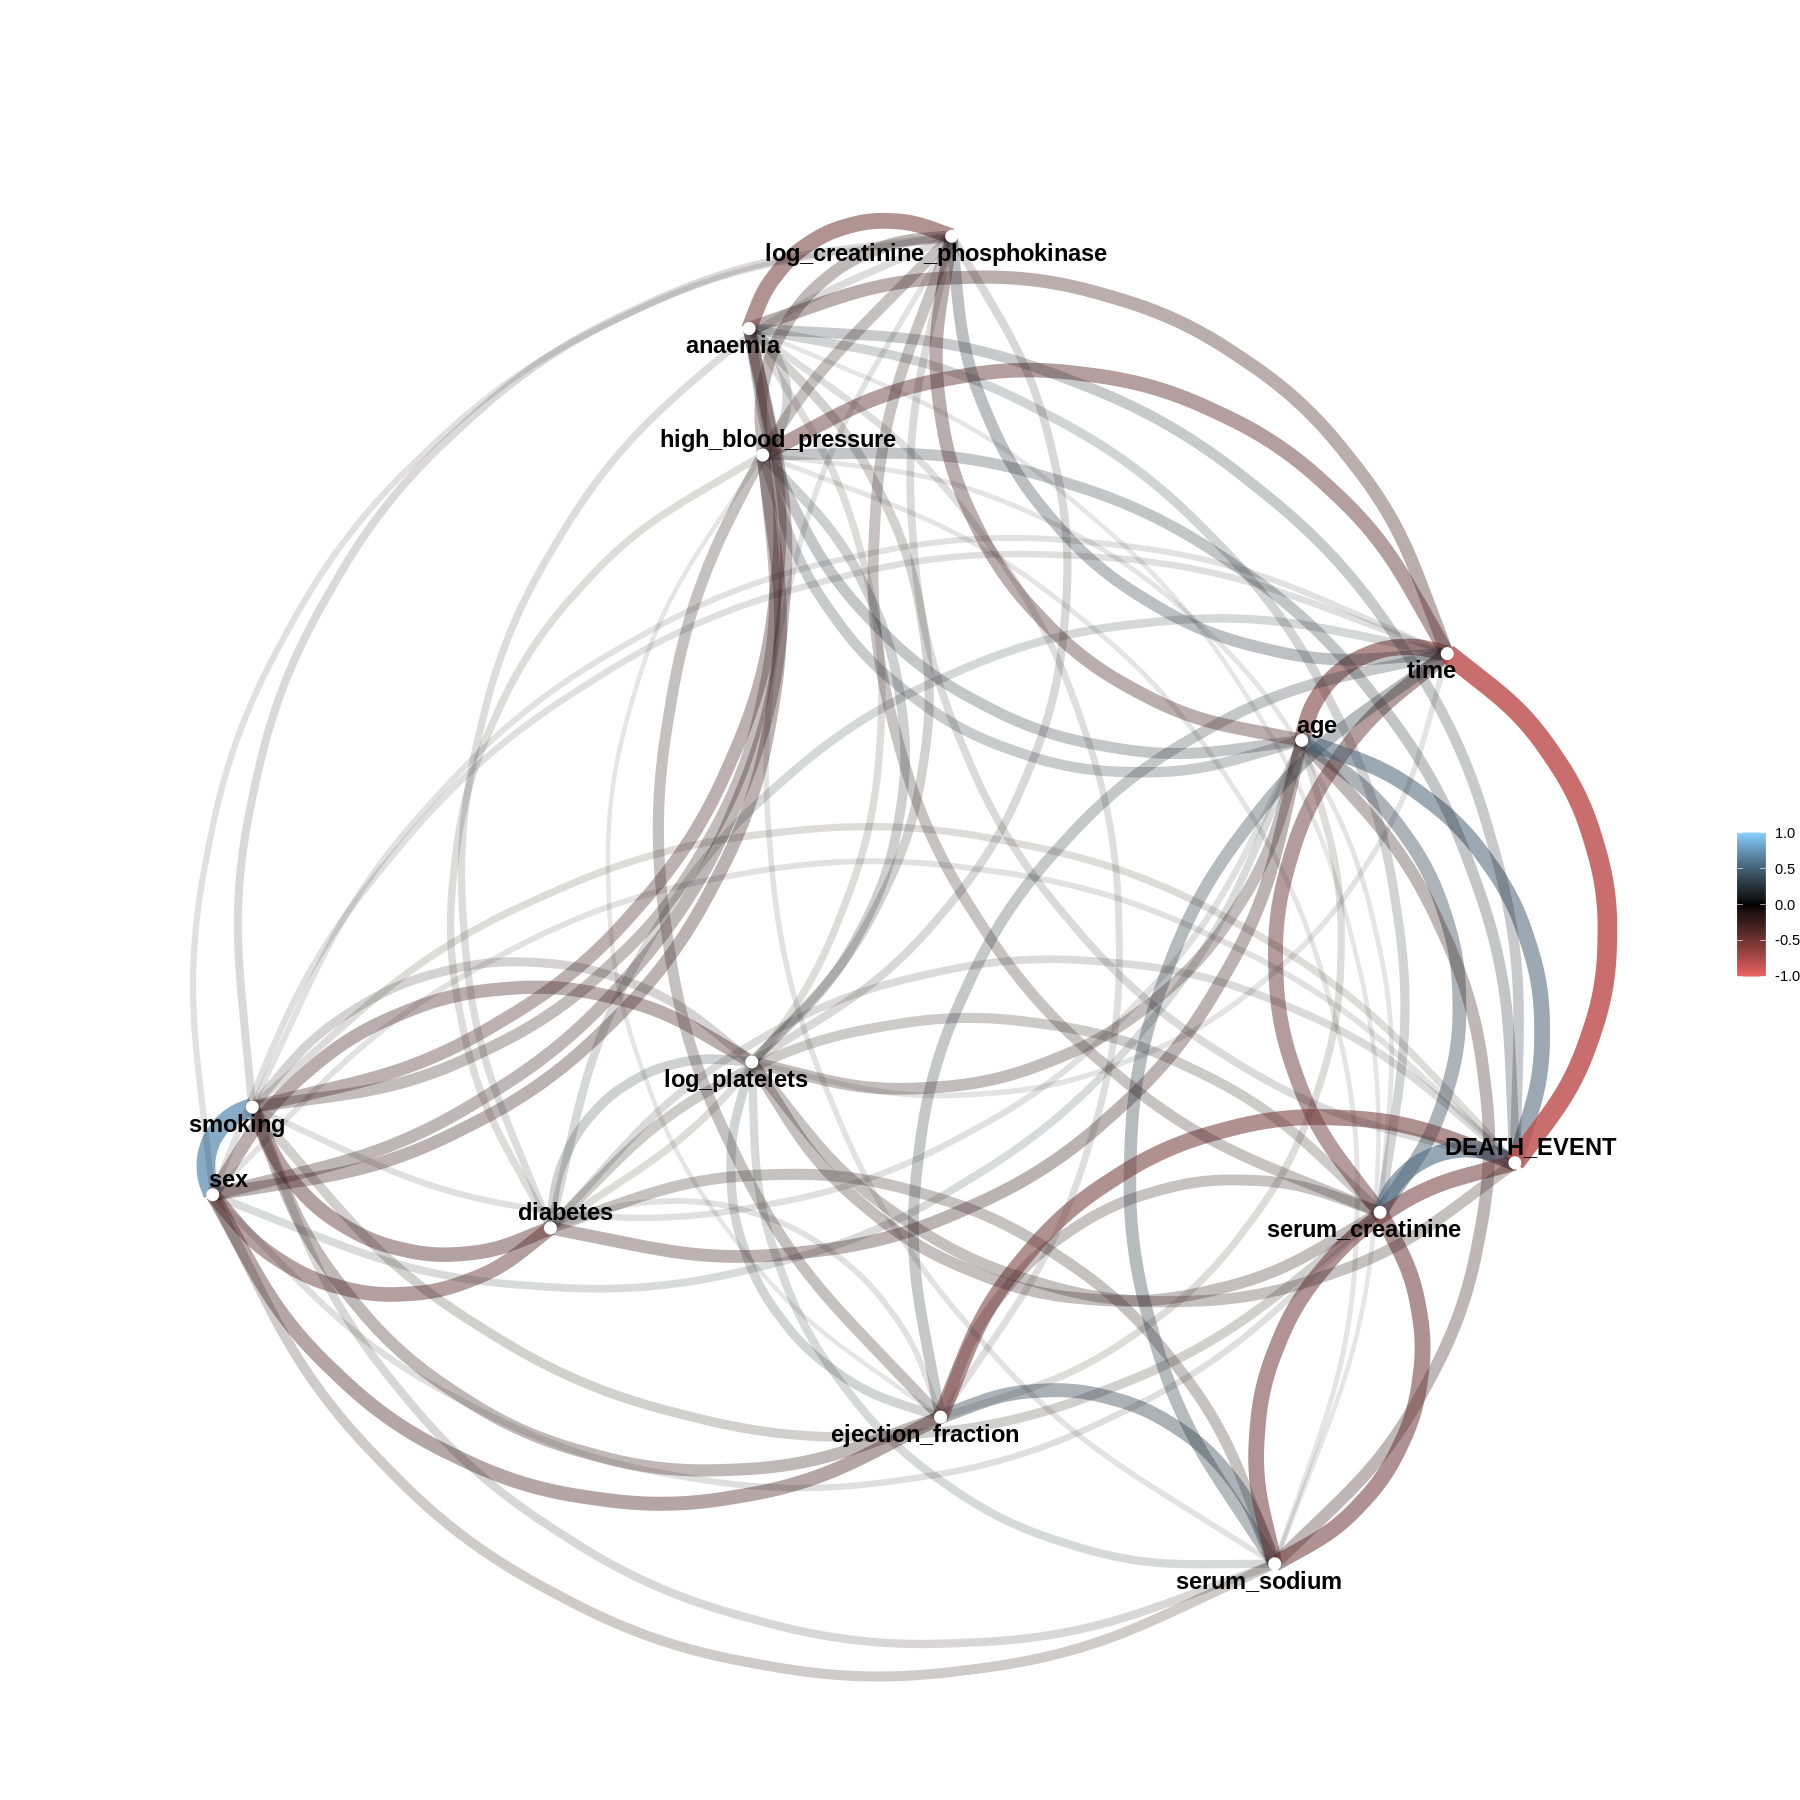

In [16]:
#상관계수를 network_plot을 이용해 시각화 하였다.
options(repr.plot.width = 15, repr.plot.height = 15)
DFHeart_cor %>%
  correlate() %>%
  network_plot(min_cor = 0, colours = c("indianred2", "black", "skyblue1"))

## 가설 설정

가설: 혈액 속 각 종 성분(크레아틴키나제, 혈소판, 크레아틴, 나트륨)의 수치가 고혈압에 영향을 미칠 것이다. 유의 수준은 0.05로 설정했다.<br>



*   귀무가설: "각 혈액 속 성분이 수치는 고혈압에 영향을 미치지 않는다."
*   대립가설: "각 혈액 속 성분이 수치는 고혈압에 영향을 미친다."
*   유의 수준: 0.05




In [17]:
options(repr.plot.width = 7, repr.plot.height = 7)

아래는 각각의 데이터 분포를 확인하기 위해 박스 플롯으로 그림을 그렸다.

[1] "고혈압과 크레아틴키나제 수치"


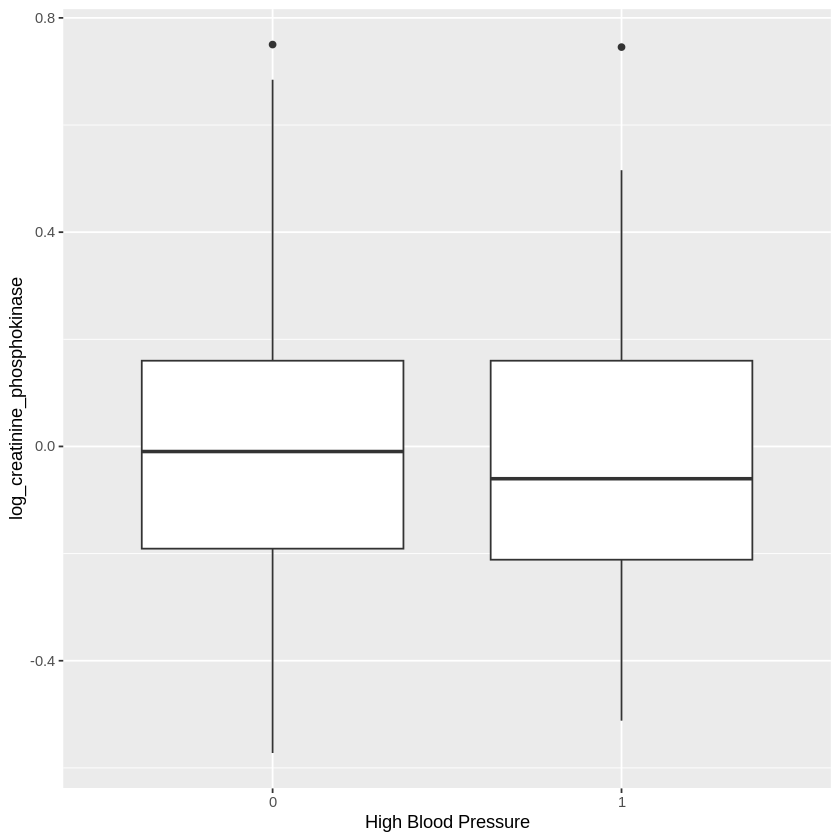

In [18]:
print("고혈압과 크레아틴키나제 수치")
ggplot(DFHeart, aes(x = high_blood_pressure, y = log_creatinine_phosphokinase)) +
  geom_boxplot() +
  labs(x = "High Blood Pressure",
       y = "log_creatinine_phosphokinase")

[1] "혈소판과 고혈압"


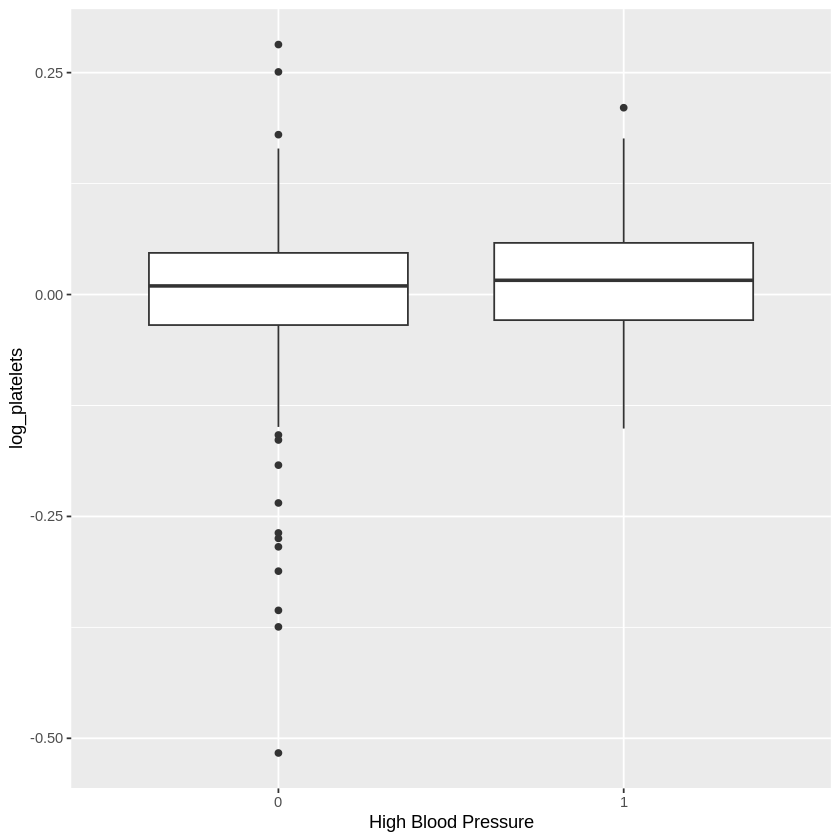

In [19]:
print("혈소판과 고혈압")
ggplot(DFHeart, aes(x = high_blood_pressure, y = log_platelets)) +
  geom_boxplot() +
  labs(x = "High Blood Pressure",
       y = "log_platelets")

[1] "크레아틴과 고혈압"


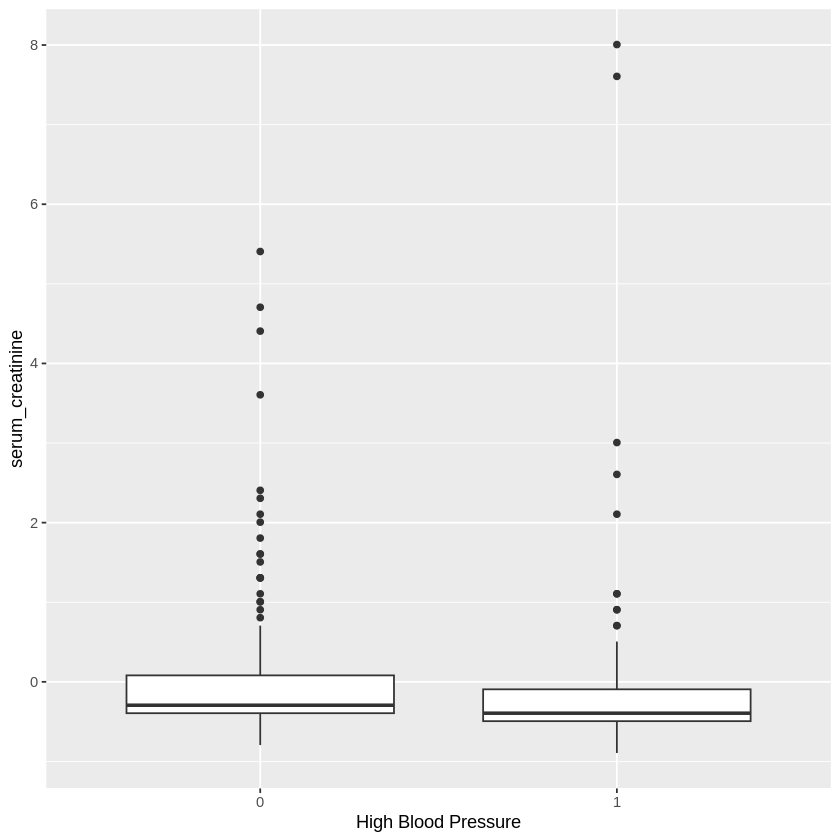

In [20]:
print("크레아틴과 고혈압")
ggplot(DFHeart, aes(x = high_blood_pressure, y = serum_creatinine)) +
  geom_boxplot() +
  labs(x = "High Blood Pressure",
       y = "serum_creatinine")

[1] "나트륨과 고혈압"


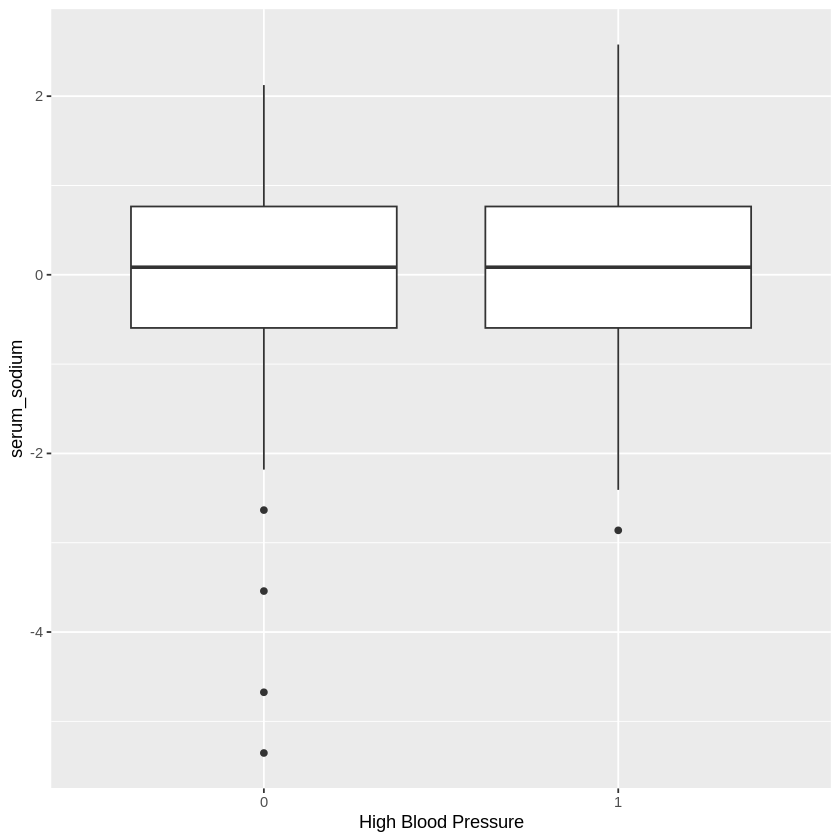

In [21]:
print("나트륨과 고혈압")
ggplot(DFHeart, aes(x = high_blood_pressure, y = serum_sodium)) +
  geom_boxplot() +
  labs(x = "High Blood Pressure",
       y = "serum_sodium")

## 회귀모델: 로지스틱 회귀모델

In [225]:
#데이터 분할
index <- caret::createDataPartition(y = DFHeart$high_blood_pressure, p = 0.9, list = FALSE)
Train_Heart <- DFHeart[index, ]
Test_Heart <- DFHeart[-index, ]

Train_Heart %>% show()
Test_Heart %>% show()

# A tibble: 270 × 13
     age anaemia diabetes ejection_fraction high_blood_pressure serum_creatinine
   <dbl> <fct>   <fct>                <int> <fct>                          <dbl>
 1    75 0       0                       20 1                             0.506 
 2    55 0       0                       38 0                            -0.294 
 3    65 0       0                       20 0                            -0.0939
 4    65 1       1                       20 0                             1.31  
 5    90 1       0                       40 1                             0.706 
 6    75 1       0                       15 0                            -0.194 
 7    60 1       1                       60 0                            -0.294 
 8    65 0       0                       65 0                             0.106 
 9    80 1       0                       35 1                             8.01  
10    75 1       0                       38 1                             2.61  
# ℹ 260

In [226]:
logisitic_model <- glm(high_blood_pressure ~ log_creatinine_phosphokinase +log_platelets + serum_creatinine + serum_sodium, data = Train_Heart, family = "binomial")
summary(logisitic_model)


Call:
glm(formula = high_blood_pressure ~ log_creatinine_phosphokinase + 
    log_platelets + serum_creatinine + serum_sodium, family = "binomial", 
    data = Train_Heart)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -0.64129    0.13058  -4.911 9.06e-07 ***
log_creatinine_phosphokinase -0.94186    0.51955  -1.813   0.0699 .  
log_platelets                 2.29790    1.49597   1.536   0.1245    
serum_creatinine             -0.08903    0.15278  -0.583   0.5601    
serum_sodium                  0.05707    0.13331   0.428   0.6686    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 350.24  on 269  degrees of freedom
Residual deviance: 343.69  on 265  degrees of freedom
AIC: 353.69

Number of Fisher Scoring iterations: 4


그나마 혈중 크레아틴키나제가 가장 영향력이 있는 변수라는 결과가 나왔다.  역전파로 학습을 한번 더 한 후에 test-set의 데이터로 결과를 예측하고 모델의 성능을 평가하자.

In [227]:
logisitic_back_model <- step(logisitic_model, direction = "backward")

Start:  AIC=353.69
high_blood_pressure ~ log_creatinine_phosphokinase + log_platelets + 
    serum_creatinine + serum_sodium

                               Df Deviance    AIC
- serum_sodium                  1   343.87 351.87
- serum_creatinine              1   344.04 352.04
<none>                              343.69 353.69
- log_platelets                 1   346.19 354.19
- log_creatinine_phosphokinase  1   347.06 355.06

Step:  AIC=351.87
high_blood_pressure ~ log_creatinine_phosphokinase + log_platelets + 
    serum_creatinine

                               Df Deviance    AIC
- serum_creatinine              1   344.39 350.39
<none>                              343.87 351.87
- log_platelets                 1   346.42 352.42
- log_creatinine_phosphokinase  1   347.26 353.26

Step:  AIC=350.39
high_blood_pressure ~ log_creatinine_phosphokinase + log_platelets

                               Df Deviance    AIC
<none>                              344.39 350.39
- log_platelets           

In [228]:
#예측을 위 역전파까지 실행한 모델을 통해 test의 결과를 예측한다.
predict_value1 <-
  predict(logisitic_back_model, Test_Heart, type = "response") %>% tibble(predict_value1 = .)
predict_value1 %>% show()

# A tibble: 29 × 1
   predict_value1
            <dbl>
 1          0.373
 2          0.271
 3          0.364
 4          0.322
 5          0.305
 6          0.330
 7          0.446
 8          0.253
 9          0.322
10          0.380
# ℹ 19 more rows


In [229]:
#결과를 비교하기 위해 저장한다.
combined_df <- cbind(Test_Heart, predict_value1)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value1))
head(result_heart)

,high_blood_pressure,predict_value1
,<fct>,<dbl>
1,0,0.3731493
2,0,0.2711533
3,0,0.3643932
4,1,0.3215658
5,0,0.3052888
6,1,0.3299761


confusionMatrix를 사용하기 위해 예측된 값을 0,1로 변환해주어야 한다.
전체적으로 값이 0.2~0.5 사이라 0.4를 기준으로 정답인지 아닌지를 판별했다.

In [230]:
result_heart <- result_heart %>%
  mutate(predict_value1 = as.factor(ifelse(predict_value1 > 0.4, 1, 0)))

result_heart %>% show()

   high_blood_pressure predict_value1
1                    0              0
2                    0              0
3                    0              0
4                    1              0
5                    0              0
6                    1              0
7                    0              1
8                    1              0
9                    0              0
10                   1              0
11                   0              0
12                   1              0
13                   1              1
14                   0              0
15                   1              0
16                   0              0
17                   1              0
18                   0              0
19                   1              0
20                   0              0
21                   0              0
22                   0              0
23                   0              0
24                   1              0
25                   0              0
26          

In [231]:
#모델을 성능을 평가하기 위해 confusionMatrix를 출력한다.
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value1)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  1
         1  9  1
                                          
               Accuracy : 0.6552          
                 95% CI : (0.4567, 0.8206)
    No Information Rate : 0.931           
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : 0.0584          
                                          
 Mcnemar's Test P-Value : 0.02686         
                                          
            Sensitivity : 0.6667          
            Specificity : 0.5000          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.1000          
             Prevalence : 0.9310          
         Detection Rate : 0.6207          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.5833          
                                          
       'Positive' Class : 0               
                                    

정확도 62.07% 로 저조한 성적을 보인다. kappa를 보면 5.84%로 사실상 랜덤한 예측과 유사하다는 결과가 나왔다. 거기에 민감도와 특이도가 각각 66.67%와 50%로 모델이 Positive를 잘 감지하지 못했다는 것을 알려주고 있다.

만약 모든 변수를 사용해서 예상한다면 어떻게 될지 확인해보았다. 위와 설명변수 설정을 제외한 모든 부분이 동일하게 구성되어있으므로 설명은 생략하겠다.

In [232]:
logisitic_model <- glm(high_blood_pressure ~ ., data = Train_Heart, family = "binomial")
summary(logisitic_model)
logisitic_back_model <- step(logisitic_model, direction = "backward")
predict_value2 <-
  predict(logisitic_back_model, Test_Heart, type = "response") %>% tibble(predict_value2 = .)
combined_df <- cbind(Test_Heart, predict_value2)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value2))

result_heart <- result_heart %>%
  mutate(predict_value2 = as.factor(ifelse(predict_value2 > 0.5, 1, 0)))


Call:
glm(formula = high_blood_pressure ~ ., family = "binomial", data = Train_Heart)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   0.707188   0.980564   0.721  0.47078   
age                           0.003847   0.012312   0.312  0.75472   
anaemia1                     -0.055181   0.282007  -0.196  0.84487   
diabetes1                    -0.277085   0.281645  -0.984  0.32521   
ejection_fraction            -0.005937   0.012247  -0.485  0.62783   
serum_creatinine             -0.169921   0.165870  -1.024  0.30563   
serum_sodium                  0.067896   0.140415   0.484  0.62871   
sex1                         -0.439669   0.318797  -1.379  0.16785   
smoking1                     -0.273169   0.329602  -0.829  0.40723   
time                         -0.006234   0.002146  -2.905  0.00367 **
DEATH_EVENT1                 -0.178519   0.369759  -0.483  0.62924   
log_creatinine_phosphokinase -0.783314   0.552395  -1.418 

Start:  AIC=354.12
high_blood_pressure ~ age + anaemia + diabetes + ejection_fraction + 
    serum_creatinine + serum_sodium + sex + smoking + time + 
    DEATH_EVENT + log_creatinine_phosphokinase + log_platelets

                               Df Deviance    AIC
- anaemia                       1   328.16 352.16
- age                           1   328.22 352.22
- DEATH_EVENT                   1   328.36 352.36
- serum_sodium                  1   328.36 352.36
- ejection_fraction             1   328.36 352.36
- smoking                       1   328.81 352.81
- diabetes                      1   329.10 353.10
- serum_creatinine              1   329.29 353.29
- sex                           1   330.04 354.04
<none>                              328.12 354.12
- log_creatinine_phosphokinase  1   330.17 354.17
- log_platelets                 1   330.38 354.38
- time                          1   336.96 360.96

Step:  AIC=352.16
high_blood_pressure ~ age + diabetes + ejection_fraction + serum_c

In [233]:
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value2)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 18  1
         1  8  2
                                          
               Accuracy : 0.6897          
                 95% CI : (0.4917, 0.8472)
    No Information Rate : 0.8966          
    P-Value [Acc > NIR] : 0.9996          
                                          
                  Kappa : 0.1767          
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.6923          
            Specificity : 0.6667          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.2000          
             Prevalence : 0.8966          
         Detection Rate : 0.6207          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.6795          
                                          
       'Positive' Class : 0               
                                    

위에 보다 성능이 약간 올라갔다. 그래도 성능이 안좋은 모델인건 똑같다.

## 분류모델: Decision Tree

In [234]:
decisiontree_model <- rpart(formula = high_blood_pressure ~ log_creatinine_phosphokinase +log_platelets + serum_creatinine + serum_sodium,
                                         data = Train_Heart,
                                         method = "class")

# 모델 요약
summary(decisiontree_model)

Call:
rpart(formula = high_blood_pressure ~ log_creatinine_phosphokinase + 
    log_platelets + serum_creatinine + serum_sodium, data = Train_Heart, 
    method = "class")
  n= 270 

          CP nsplit rel error   xerror       xstd
1 0.03157895      0 1.0000000 1.000000 0.08259910
2 0.02105263      4 0.8631579 1.157895 0.08498668
3 0.01052632      6 0.8210526 1.242105 0.08579408
4 0.01000000     14 0.7157895 1.347368 0.08636617

Variable importance
log_creatinine_phosphokinase                log_platelets 
                          49                           28 
            serum_creatinine                 serum_sodium 
                          13                           11 

Node number 1: 270 observations,    complexity param=0.03157895
  predicted class=0  expected loss=0.3518519  P(node) =1
    class counts:   175    95
   probabilities: 0.648 0.352 
  left son=2 (151 obs) right son=3 (119 obs)
  Primary splits:
      serum_creatinine             < -0.3438796  to the right, i

위의 결과에서 log_creatinine_phosphokinase, log_platelets가 중요도가 넢은 변수이며 타 변수도 어느정도 영향력을 주고 있다.


                
                    CP nsplit  rel_error  xerror       xstd
          1 0.03157895      0 1.0000000 1.000000 0.08259910
          2 0.02105263      4 0.8631579 1.157895 0.08498668
          3 0.01052632      6 0.8210526 1.242105 0.08579408
          4 0.01000000     14 0.7157895 1.347368 0.08636617

1->2로 넘어갈 때 xerror값이 내려가야 하지만 내려가지 않고 올라갔다. 이는 과적합이 되었다는 의미로 모델이 일반화가 덜 됬다는 지표이다. 그리고 성능이 좋지 않다 말이기도 하다.

In [235]:
library(RColorBrewer)

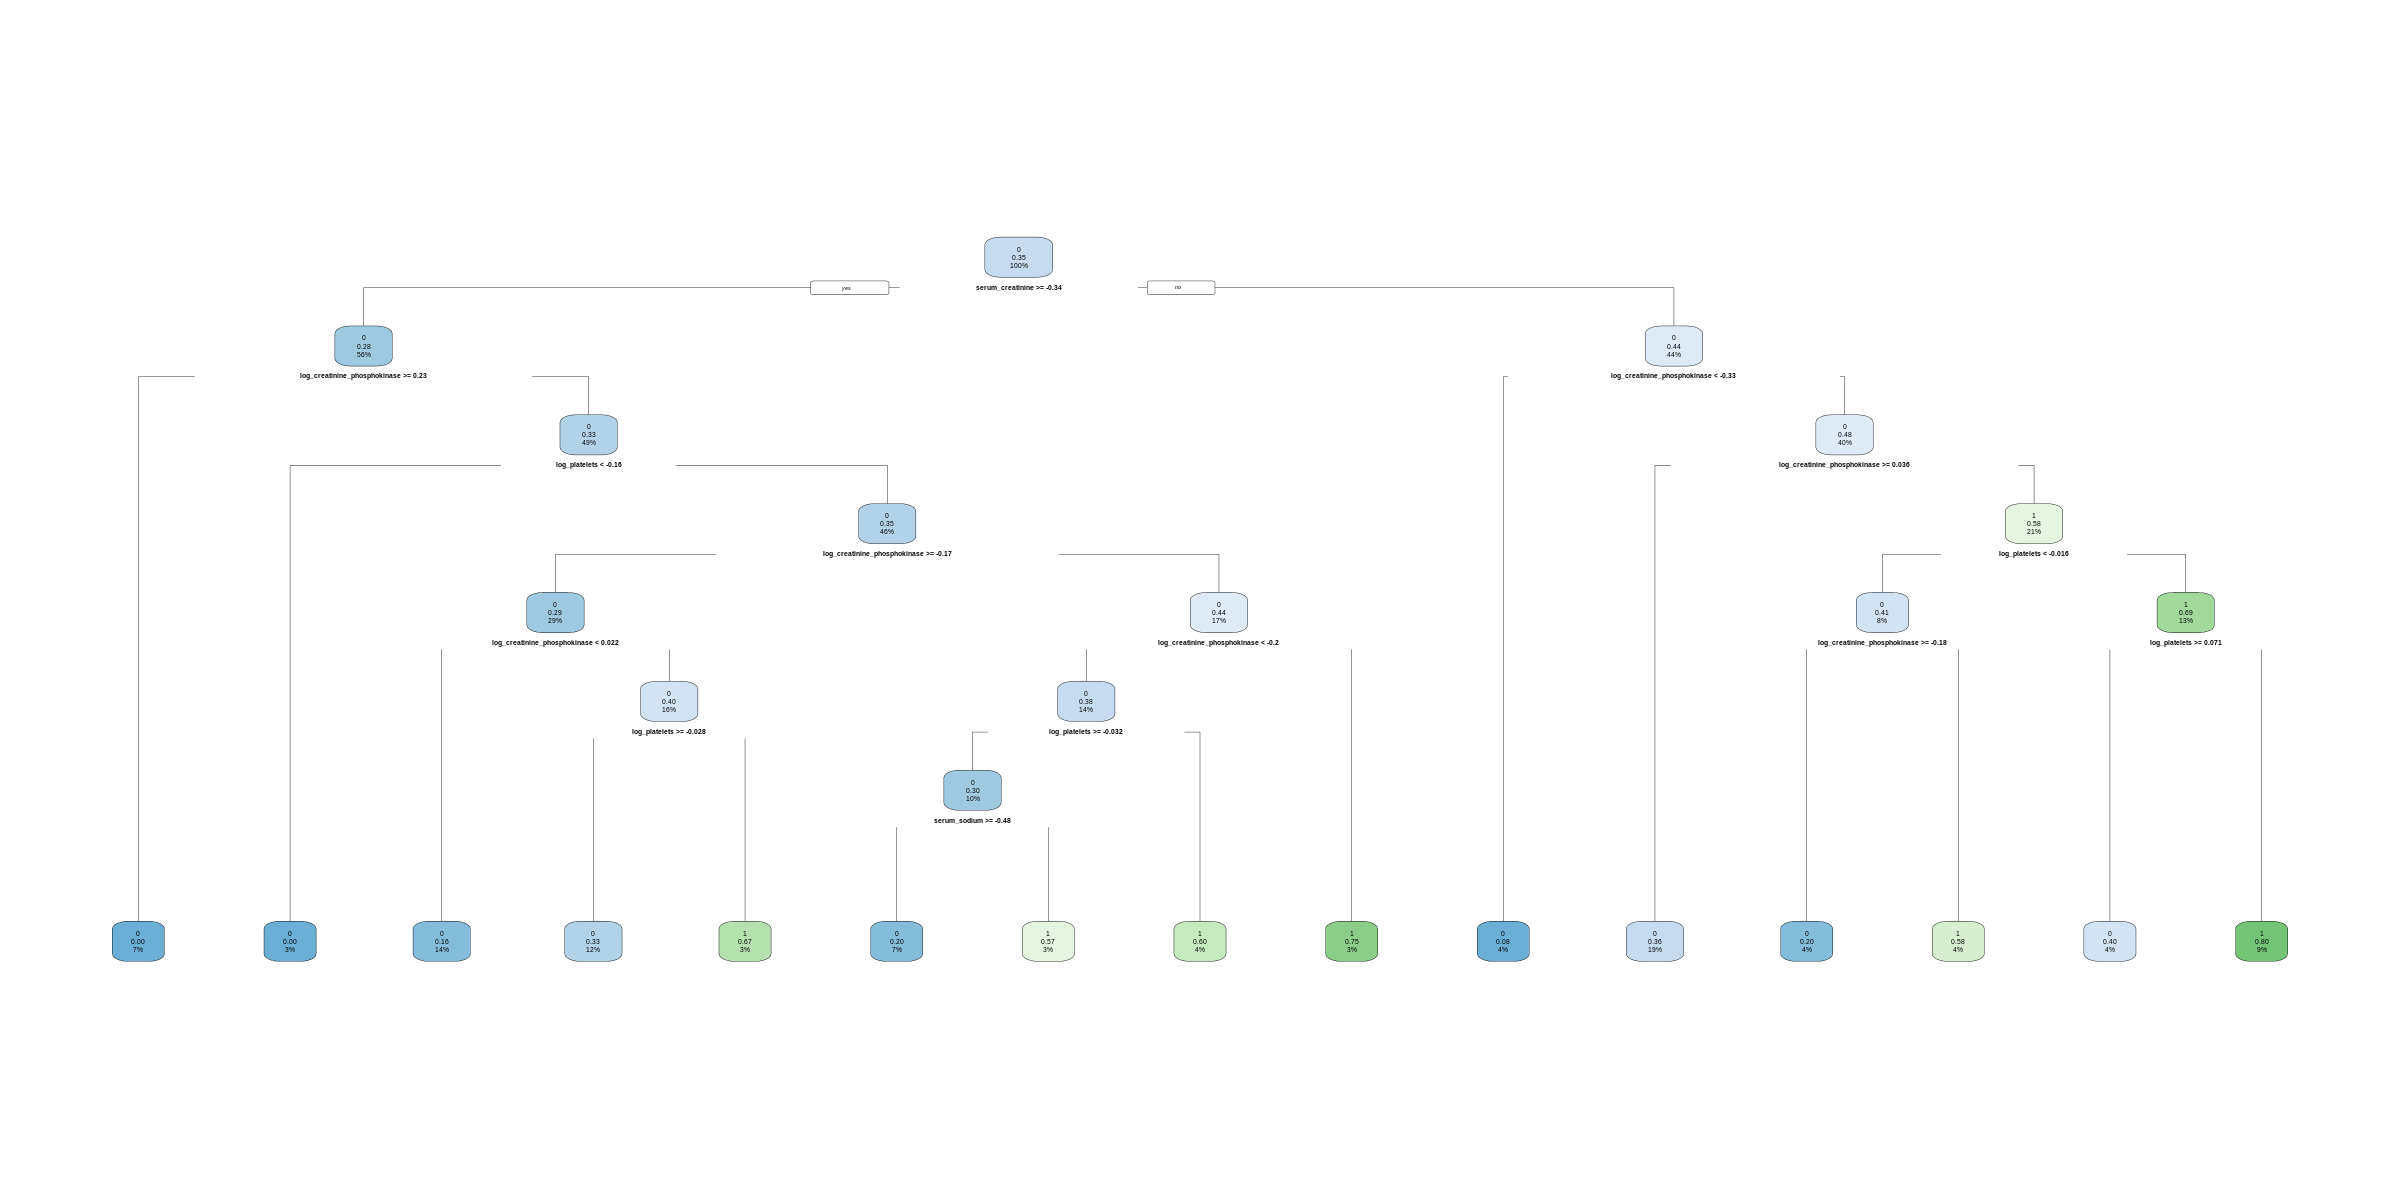

In [236]:
options(repr.plot.width = 20, repr.plot.height = 10)
rpart.plot(decisiontree_model)

In [253]:
#예측을 위 역전파까지 실행한 모델을 통해 test의 결과를 예측한다.
predict_value3 <-
  predict_value3 <- predict(decisiontree_model, Test_Heart, type = "class") %>% tibble(predict_value3 = .)
predict_value3 %>% show()

# A tibble: 29 × 1
   predict_value3
   <fct>         
 1 0             
 2 1             
 3 0             
 4 0             
 5 0             
 6 0             
 7 1             
 8 0             
 9 0             
10 1             
# ℹ 19 more rows


In [254]:
#결과를 비교하기 위해 저장한다.
combined_df <- cbind(Test_Heart, predict_value3)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value3))
head(result_heart)

,high_blood_pressure,predict_value3
,<fct>,<fct>
1,0,0
2,0,1
3,0,0
4,1,0
5,0,0
6,1,0


In [255]:
#모델을 성능을 평가하기 위해 confusionMatrix를 출력한다.
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value3)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  9 10
         1  8  2
                                          
               Accuracy : 0.3793          
                 95% CI : (0.2069, 0.5774)
    No Information Rate : 0.5862          
    P-Value [Acc > NIR] : 0.9925          
                                          
                  Kappa : -0.3116         
                                          
 Mcnemar's Test P-Value : 0.8137          
                                          
            Sensitivity : 0.5294          
            Specificity : 0.1667          
         Pos Pred Value : 0.4737          
         Neg Pred Value : 0.2000          
             Prevalence : 0.5862          
         Detection Rate : 0.3103          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.3480          
                                          
       'Positive' Class : 0               
                                    

정확도가 더 떨어졌다. 역시 모델의 성능이 좋지 않았다.

아래는 모든 설명 변수를 사용했을 떄의 가정이다.

In [256]:
decisiontree_model <- rpart(formula = high_blood_pressure ~ .,
                                         data = Train_Heart,
                                         method = "class")
summary(decisiontree_model)

predict_value4 <-
  predict_value4 <- predict(decisiontree_model, Test_Heart, type = "class") %>% tibble(predict_value4 = .)

combined_df <- cbind(Test_Heart, predict_value4)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value4))

Call:
rpart(formula = high_blood_pressure ~ ., data = Train_Heart, 
    method = "class")
  n= 270 

          CP nsplit rel error   xerror       xstd
1 0.03508772      0 1.0000000 1.000000 0.08259910
2 0.02105263      7 0.7368421 1.210526 0.08552819
3 0.01403509      9 0.6947368 1.221053 0.08562170
4 0.01315789     14 0.6000000 1.221053 0.08562170
5 0.01000000     18 0.5473684 1.242105 0.08579408

Variable importance
                        time                          age 
                          30                           14 
            serum_creatinine                 serum_sodium 
                          12                           11 
log_creatinine_phosphokinase                log_platelets 
                          10                            7 
           ejection_fraction                      smoking 
                           6                            4 
                 DEATH_EVENT                      anaemia 
                           3                   

In [257]:
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value4)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  9 10
         1  8  2
                                          
               Accuracy : 0.3793          
                 95% CI : (0.2069, 0.5774)
    No Information Rate : 0.5862          
    P-Value [Acc > NIR] : 0.9925          
                                          
                  Kappa : -0.3116         
                                          
 Mcnemar's Test P-Value : 0.8137          
                                          
            Sensitivity : 0.5294          
            Specificity : 0.1667          
         Pos Pred Value : 0.4737          
         Neg Pred Value : 0.2000          
             Prevalence : 0.5862          
         Detection Rate : 0.3103          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.3480          
                                          
       'Positive' Class : 0               
                                    

모든 변수를 사용했지만 위와 동일한 결과로 p-value가 0.8137으로 유의 수준에 도달하여 귀무가설을 기각시킬만한 근거가 없다.

## 분류모델: RandomForest

In [258]:
# randomForest 실행
randomforest_model <- randomForest(high_blood_pressure ~ log_creatinine_phosphokinase +log_platelets + serum_creatinine + serum_sodium, data = Train_Heart, ntree = 1000)

In [259]:
#예측을 위 역전파까지 실행한 모델을 통해 test의 결과를 예측한다.
predict_value5 <-
  predict(randomforest_model, Test_Heart) %>% tibble(predict_value5 = .)
predict_value5 %>% show()

# A tibble: 29 × 1
   predict_value5
   <fct>         
 1 0             
 2 0             
 3 1             
 4 0             
 5 0             
 6 0             
 7 0             
 8 0             
 9 0             
10 0             
# ℹ 19 more rows


In [260]:
#결과를 비교하기 위해 저장한다.
combined_df <- cbind(Test_Heart, predict_value5)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value5))
head(result_heart)

,high_blood_pressure,predict_value5
,<fct>,<fct>
1,0,0
2,0,0
3,0,1
4,1,0
5,0,0
6,1,0


In [261]:
#모델을 성능을 평가하기 위해 confusionMatrix를 출력한다.
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value5)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 15  4
         1  9  1
                                          
               Accuracy : 0.5517          
                 95% CI : (0.3569, 0.7355)
    No Information Rate : 0.8276          
    P-Value [Acc > NIR] : 0.9999          
                                          
                  Kappa : -0.1254         
                                          
 Mcnemar's Test P-Value : 0.2673          
                                          
            Sensitivity : 0.6250          
            Specificity : 0.2000          
         Pos Pred Value : 0.7895          
         Neg Pred Value : 0.1000          
             Prevalence : 0.8276          
         Detection Rate : 0.5172          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.4125          
                                          
       'Positive' Class : 0               
                                    

역시 성능이 좋지 않다. 정확도 55.17%에 kappa가 -12.54%로 해당 모델의 수준은 무작위에 가깝다고 볼 수 있다.

모든 설명 변수를 사용하여 학습을 시켜볼 것이다.

In [264]:
randomforest_model <- randomForest(high_blood_pressure ~ ., data = Train_Heart, ntree = 1000)

predict_value6 <-
  predict(randomforest_model, Test_Heart) %>% tibble(predict_value6 = .)

combined_df <- cbind(Test_Heart, predict_value6)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value6))

In [265]:
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value6)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 15  4
         1 10  0
                                          
               Accuracy : 0.5172          
                 95% CI : (0.3253, 0.7055)
    No Information Rate : 0.8621          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.2454         
                                          
 Mcnemar's Test P-Value : 0.1814          
                                          
            Sensitivity : 0.6000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7895          
         Neg Pred Value : 0.0000          
             Prevalence : 0.8621          
         Detection Rate : 0.5172          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.3000          
                                          
       'Positive' Class : 0               
                                    

TP를 예측해내지 못했다! 정말 모델의 성능이 떨어진다.

## 분류모델: SVM

In [267]:
tuned <- e1071::tune.svm(high_blood_pressure ~ log_creatinine_phosphokinase +log_platelets + serum_creatinine + serum_sodium, data = Train_Heart, gamma=10^(-8:1), cost=1:30)

summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 1e-08    1

- best performance: 0.3518519 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.3518519 0.10365960
2   1e-07    1 0.3518519 0.10365960
3   1e-06    1 0.3518519 0.10365960
4   1e-05    1 0.3518519 0.10365960
5   1e-04    1 0.3518519 0.10365960
6   1e-03    1 0.3518519 0.10365960
7   1e-02    1 0.3518519 0.10365960
8   1e-01    1 0.3518519 0.10365960
9   1e+00    1 0.4222222 0.10648819
10  1e+01    1 0.3962963 0.09728834
11  1e-08    2 0.3518519 0.10365960
12  1e-07    2 0.3518519 0.10365960
13  1e-06    2 0.3518519 0.10365960
14  1e-05    2 0.3518519 0.10365960
15  1e-04    2 0.3518519 0.10365960
16  1e-03    2 0.3518519 0.10365960
17  1e-02    2 0.3518519 0.10365960
18  1e-01    2 0.3518519 0.10365960
19  1e+00    2 0.4518519 0.08868289
20  1e+01    2 0.4000000 0.07570227
21  1e-08    3 0.3518519 0.10365960
22  1e-07    3 0.3518519 

In [268]:
best_param <- summary(tuned)$best.parameters
best_param

,gamma,cost
,<dbl>,<int>
1,1e-08,1


In [269]:
svm_best_model <- e1071::svm(high_blood_pressure ~ log_creatinine_phosphokinase +log_platelets + serum_creatinine + serum_sodium,
                                data = Train_Heart, type = "C-classification",
                                kernel = "radial",
                                gamma = best_param[1,1],
                                cost = best_param[1,2])

summary(svm_best_model)


Call:
svm(formula = high_blood_pressure ~ log_creatinine_phosphokinase + 
    log_platelets + serum_creatinine + serum_sodium, data = Train_Heart, 
    type = "C-classification", kernel = "radial", gamma = best_param[1, 
        1], cost = best_param[1, 2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  190

 ( 95 95 )


Number of Classes:  2 

Levels: 
 0 1




모델을 통해 test의 예측을 진행한다.

In [276]:
predict_value7 <-
  predict(svm_best_model, Test_Heart) %>% tibble(predict_value7 = .)
show(predict_value7)

# A tibble: 29 × 1
   predict_value7
   <fct>         
 1 0             
 2 0             
 3 0             
 4 0             
 5 0             
 6 0             
 7 0             
 8 0             
 9 0             
10 0             
# ℹ 19 more rows


In [273]:
combined_df <- cbind(Test_Heart, predict_value7)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value7))
head(result_heart)

,high_blood_pressure,predict_value7
,<fct>,<fct>
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,1,0


In [275]:
caret::confusionMatrix(Test_Heart$high_blood_pressure, result_heart$predict_value7)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 19  0
         1 10  0
                                          
               Accuracy : 0.6552          
                 95% CI : (0.4567, 0.8206)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 0.6552          
            Specificity :     NA          
         Pos Pred Value :     NA          
         Neg Pred Value :     NA          
             Prevalence : 1.0000          
         Detection Rate : 0.6552          
   Detection Prevalence : 0.6552          
      Balanced Accuracy :     NA          
                                          
       'Positive' Class : 0               
                                    

전부다 0으로 예측해서 정상적인 모델이라고 할 수 없다. 그래도 이전 모델들은 과적합으로 어느정도 분류는 시도했으나 해당 모델은 분류조차 하지 않는다. 분류기라고 말할 수 없다.

아래는 모든 설명 변수를 이용하여 예측 한 것이다.

In [277]:
tuned <- e1071::tune.svm(high_blood_pressure~., data=Train_Heart, gamma=10^(-8:1), cost=1:30)

summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 1e-08    1

- best performance: 0.3518519 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.3518519 0.07660292
2   1e-07    1 0.3518519 0.07660292
3   1e-06    1 0.3518519 0.07660292
4   1e-05    1 0.3518519 0.07660292
5   1e-04    1 0.3518519 0.07660292
6   1e-03    1 0.3518519 0.07660292
7   1e-02    1 0.3518519 0.07660292
8   1e-01    1 0.3592593 0.07417688
9   1e+00    1 0.3703704 0.07808093
10  1e+01    1 0.3518519 0.07660292
11  1e-08    2 0.3518519 0.07660292
12  1e-07    2 0.3518519 0.07660292
13  1e-06    2 0.3518519 0.07660292
14  1e-05    2 0.3518519 0.07660292
15  1e-04    2 0.3518519 0.07660292
16  1e-03    2 0.3518519 0.07660292
17  1e-02    2 0.3518519 0.07660292
18  1e-01    2 0.3740741 0.08633152
19  1e+00    2 0.3740741 0.07499428
20  1e+01    2 0.3518519 0.07660292
21  1e-08    3 0.3518519 0.07660292
22  1e-07    3 0.3518519 

In [278]:
svm_best_model <- e1071::svm(high_blood_pressure ~ .,
                                data = Train_Heart, type = "C-classification",
                                kernel = "radial",
                                gamma = best_param[1,1],
                                cost = best_param[1,2])

In [279]:
predict_value8 <-
  predict(randomforest_model, Test_Heart) %>% tibble(predict_value8 = .)

combined_df <- cbind(Test_Heart, predict_value8)
result_heart <- combined_df %>% select(c(high_blood_pressure, predict_value8))


In [281]:
caret::confusionMatrix(result_heart$high_blood_pressure, result_heart$predict_value8)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 15  4
         1 10  0
                                          
               Accuracy : 0.5172          
                 95% CI : (0.3253, 0.7055)
    No Information Rate : 0.8621          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : -0.2454         
                                          
 Mcnemar's Test P-Value : 0.1814          
                                          
            Sensitivity : 0.6000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7895          
         Neg Pred Value : 0.0000          
             Prevalence : 0.8621          
         Detection Rate : 0.5172          
   Detection Prevalence : 0.6552          
      Balanced Accuracy : 0.3000          
                                          
       'Positive' Class : 0               
                                    

1을 어느정도 예측하였으나 전부 실패하였다. 사실상 TP를 예측하지 못했다.